
<h2 align="center">Visual illusions and interactions in biologically inspired neural networks. Analyzing perception of tilt</h2> 

Below are some functions definitions that we will need 

In [ ]:
# Imports
import math as m
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import pylab as pl
from pylab import exp,cos,sin,pi,tan, pi
import pandas as pd
import seaborn as sb
import holoviews as hv
%matplotlib inline
hv.notebook_extension()

Saliency - is the state or quality by which it stands out relative to its neighbors

Dayan paper about contextual effects inferred from image statistics.
It's a really tough paper but worth the effort. I don't think it will be
directly relevant to how we will be approaching the modeling, but it
should give you an idea of what the interplay between brain inspired
modeling and machine learning can be.

Sine and cosine. Always useful to double check arithmetic + nice plots

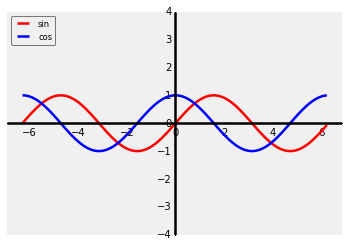

In [2]:
# Sine and cosine with numbers
from pylab import *

x = np.arange(-2*m.pi, 2*m.pi, 0.1);
sine = np.sin(x)
cosine = np.cos(x)
plt.plot(x, sine, color="red", linewidth=2.5, linestyle="-", label="sin")
plt.plot(x, cosine, color="blue", linewidth=2.5, linestyle="-", label="cos")
plt.xlim(x.min()*1.1, x.max()*1.1)
plt.ylim(-4, 4)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend(loc="upper left")

plt.show()

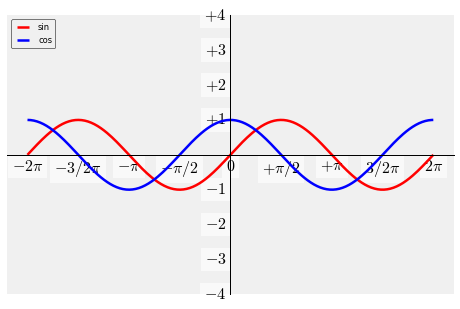

In [3]:
# Sine and cosine with pi
from pylab import *

# rendering area
figure(figsize=(8,5), dpi=80)

# display area to use; can be modified to accomodate more graphs
subplot(111)

# range
x = np.linspace(-2 * np.pi , (2 * np.pi), 256,endpoint=True)

# formulas to graph
sine = np.sin(x)
cosine = np.cos(x)
tangent = np.tan(x)
cotangent = 1/np.tan(x)
cosecant = 1/np.sin(x)
secant = 1/np.cos(x)

# line styles and labels
plot(x, sine, color="red", linewidth=2.5, linestyle="-", label="sin")
plot(x, cosine, color="blue", linewidth=2.5, linestyle="-", label="cos")
#plot(x, tangent, color="orange", linewidth=2.5, linestyle="-", label="tan")
#plot(x, cotangent, color="purple", linewidth=2.5, linestyle="-", label="cot")
#plot(x, cosecant, color="green", linewidth=2.5, linestyle="-", label="csc")
#plot(x, secant, color="yellow", linewidth=2.5, linestyle="-", label="sec")

# tick spines
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# x tick limits and labels
xlim(x.min()*1.1, x.max()*1.1)
xticks([(-2 * np.pi), (-3 * np.pi/2), -np.pi, -np.pi/2, 0, np.pi/2, np.pi, (3 * np.pi/2), (2 * np.pi)], [r'$-2\pi$', r'$-3/2\pi$', r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$', r'$3/2\pi$', r'$2\pi$'])

# y tick limits and labels
ylim(-4, 4)
yticks([-4, -3, -2, -1, +1, +2, +3, +4], [r'$-4$', r'$-3$', r'$-2$', r'$-1$', r'$+1$', r'$+2$', r'$+3$', r'$+4$'])

# legend
legend(loc='upper left')

for label in ax.get_xticklabels() + ax.get_yticklabels():
  label.set_fontsize(16)
  label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

# display
show()

In [2]:
# Seaborn library
%%opts Distribution (hist=False kde_kws=dict(shade=True))
d1 = 25 * np.random.randn(500) + 450
d2 = 45 * np.random.randn(500) + 540
d3 = 55 * np.random.randn(500) + 590
hv.Distribution(d1, label='Blue') *\
hv.Distribution(d2, label='Red') *\
hv.Distribution(d3, label='Yellow')

SyntaxError: invalid syntax (<ipython-input-2-dae541ca6f12>, line 2)

In [ ]:
def mises(a,k,ref,x):
    ''' basic von mises function
    Inputs
    -----------------------
    - a: determines magnitude
    - k: determines width (low k is wider width)
    - ref: reference angle
    - x: input angle
    '''
    return a*exp(k*(cos(2*(ref-x))))

In [ ]:
def plotbar(x,y,th,color='k',width=2,l=1):
    ''' 
    Plot a single bar 
    x,y: location middle of bar
    th(eta): orientation
    color: color (default = black)
    width: linewidth (default = 2)
    l:     line length (default = 1)
    Returns a holoviews curve object
    '''
    #    th += pl.pi/4 # so that the orientation is relative to the vertical
    hl = l/2 # half length bar
    
    # define x and y points of bar
    X = [x-pl.sin(th)*hl,x+pl.sin(th)*hl]
    Y = [y-pl.cos(th)*hl,y+pl.cos(th)*hl]
    
    # return holoviews curve
    return hv.Curve(zip(X,Y))    

In [ ]:
def plotbar2(x,y,theta):
    x,y = np.mgrid[-50:51, -50:51] * 0.1
    bounds=(-1,-1,1,1)   # Coordinate system: (left, bottom, top, right)

    (hv.Image(np.sin(x**2+y**2),   bounds=bounds) + hv.Image(np.sin(x**2+y**2), bounds=bounds)[-0.5:0.5, -0.5:0.5])

In [7]:
# Used for installing python notebook extensions
from __future__ import print_function
from jupyter_core.paths import jupyter_data_dir, jupyter_path
from __future__ import print_function
from jupyter_core.paths import jupyter_config_dir, jupyter_config_path
print(jupyter_data_dir())
print(jupyter_path())
print(jupyter_config_dir())
print(jupyter_config_path())

/home/martin/.local/share/jupyter
['/home/martin/.local/share/jupyter', '/usr/local/share/jupyter', '/usr/share/jupyter']
/home/martin/.jupyter
['/home/martin/.jupyter', '/usr/etc/jupyter', '/usr/local/etc/jupyter', '/etc/jupyter']


3.96255342154


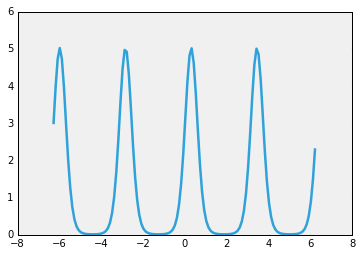

100

In [8]:
# Tests

# Test von Mises function
k = 0.25;
A = 3;
print (mises(k,A,0.5,0.7))


# Test plotting
x = np.arange(-2*pi, 2*pi, 0.1);
VMs = mises(k,A,x,0.3)
plt.plot(x,VMs)
plt.show()

# Test holoviews plotting
points = [i for i in np.arange(0, pi, 0.1)]
points = [(points[i], mises(k,A,points[i],pi)) for i in range(len(points))]
pair = hv.Curve(points)
pair

# Test dictionaries

phases = np.arange(0,10,1)
keys = [(p,f) for p in phases for f in phases]
len(keys)

In [ ]:
def mises_curve(a,k,angle):
    points = [i for i in np.arange(0, pi, 0.1)]
    points = [(points[i], mises(k,A,points[i],angle)) for i in range(len(points))]
    curve = hv.Curve(points)
    return curve

:HoloMap   [Angle]
   :Curve   [x]   (y)
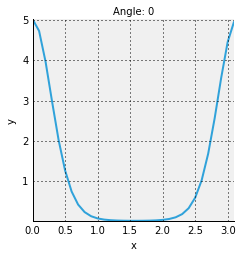
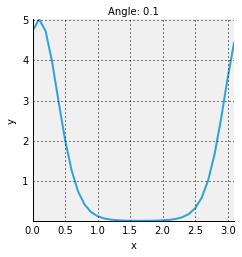
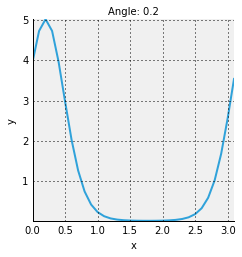
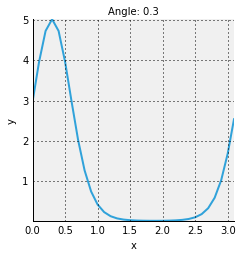
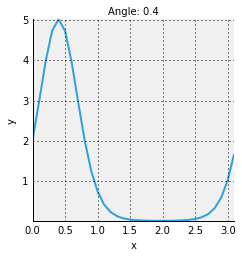
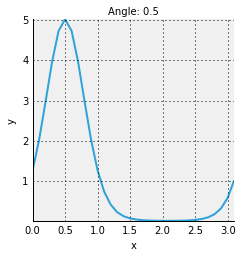
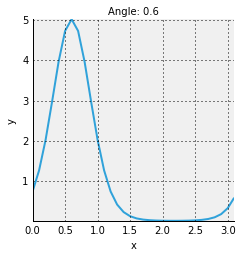
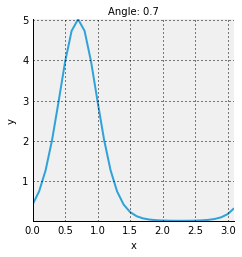
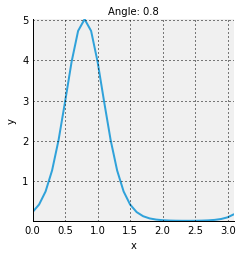
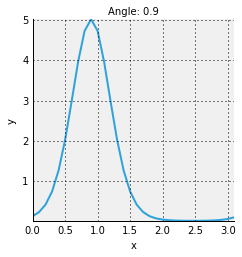
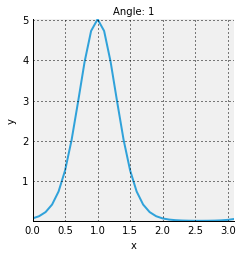
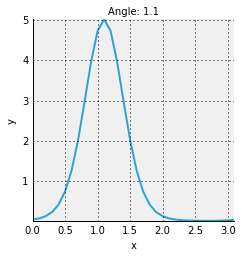
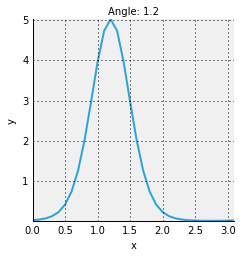
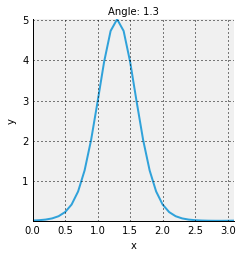
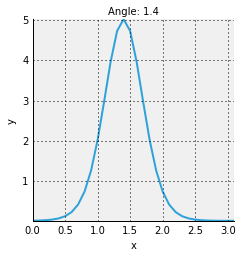
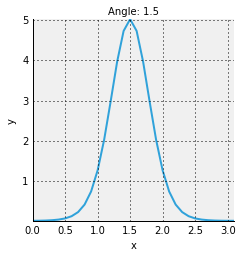
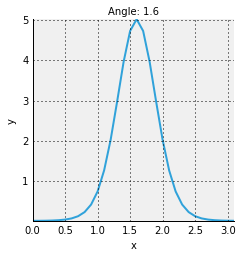
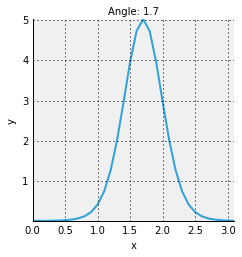
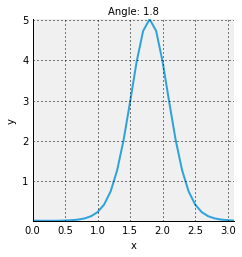
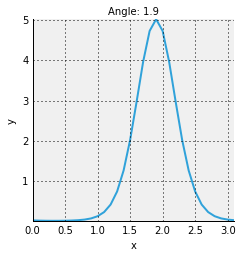
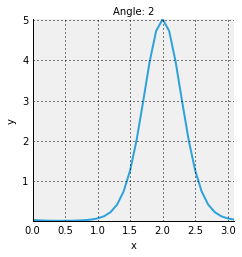
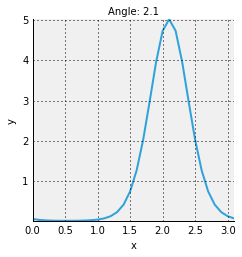
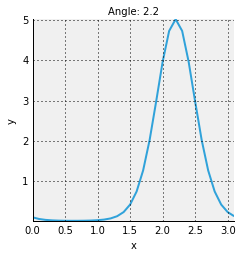
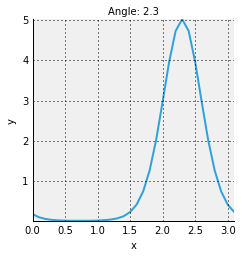
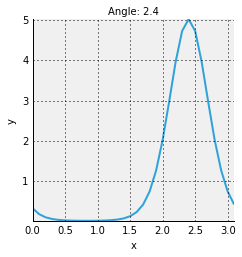
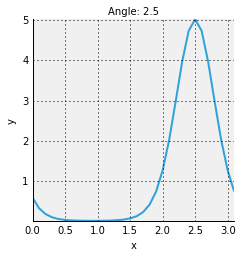
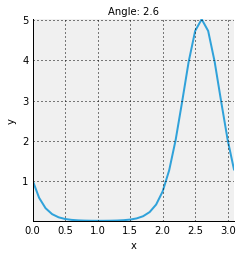
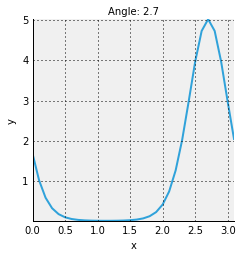
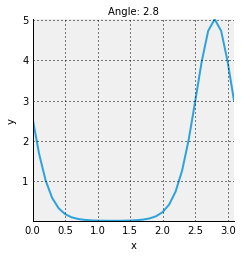
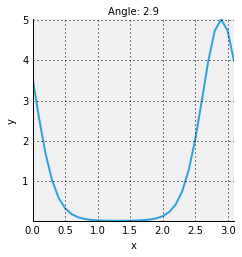
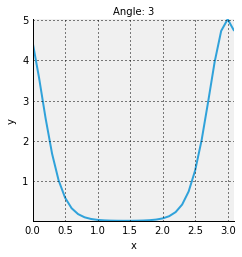
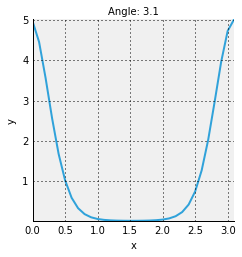

In [10]:
# Output of different orientation selective neurons for given orienatation
data = {angle:(mises_curve(A,k,angle))
        for angle in np.arange(0, pi, 0.1)}
levels = hv.HoloMap(data, kdims=['Angle']).collate()
levels

This time we specify number of orientation selective neurons as well.

In [ ]:
def mises_curve(a,k,angle,neuron):
    points = [i for i in np.arange(0, pi, pi/(neuron+1))]
    points_mises = [ mises(k,A,points[i],angle) for i in range(len(points))]
    curve = hv.Curve(zip(points,points_mises))
    return curve

In [12]:
# Generate the data
angle_neurons = [(angle,neurons) for angle in np.arange(0, pi, 0.1) for neurons in range(1,15,1)]
data = [(angle_neuron, mises_curve(A,k,*angle_neuron)) for angle_neuron in angle_neurons]
len(data)

448

:HoloMap   [Angle,Neurons]
   :Curve   [x]   (y)
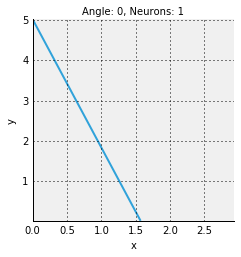
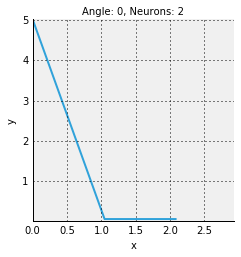
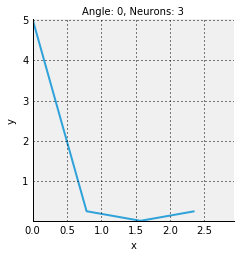
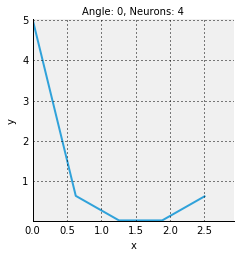
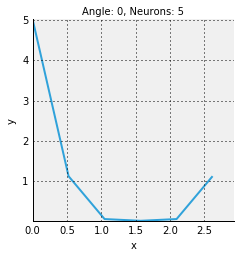
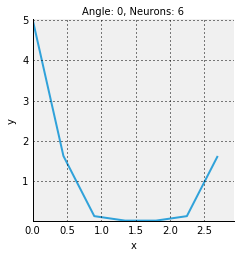
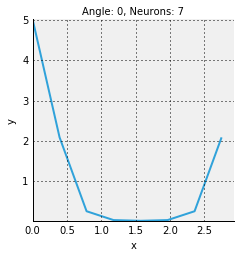
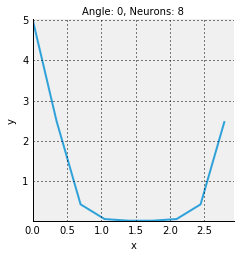
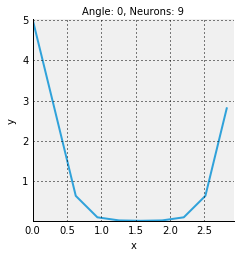
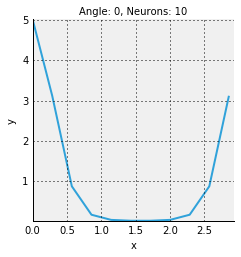
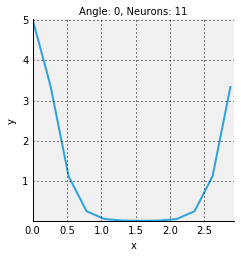
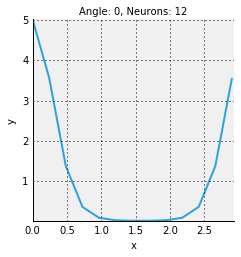
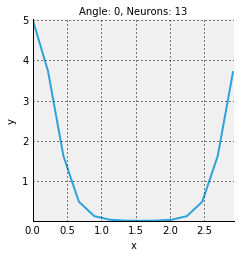
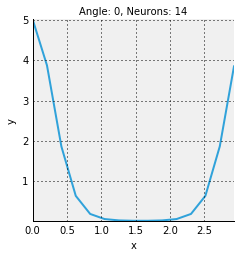
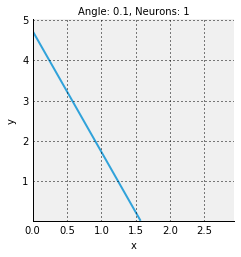
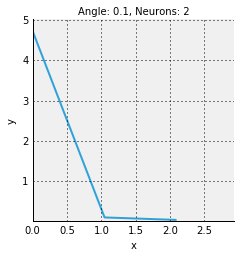
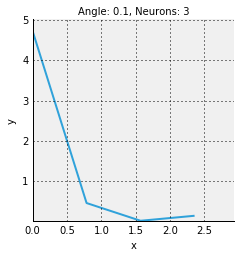
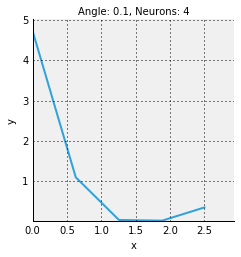
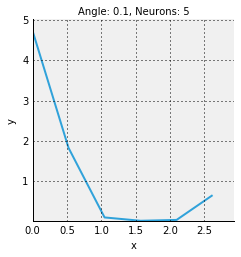
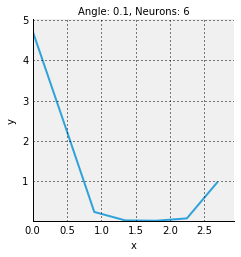
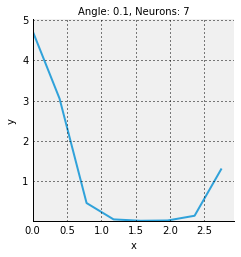
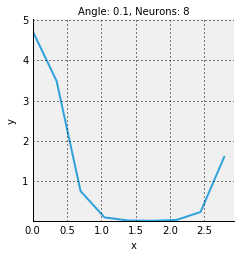
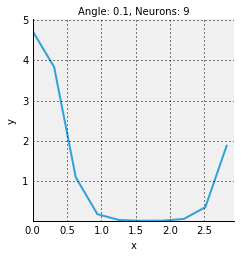
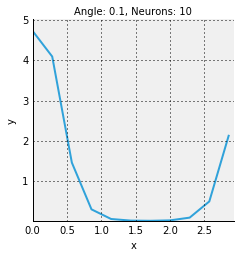
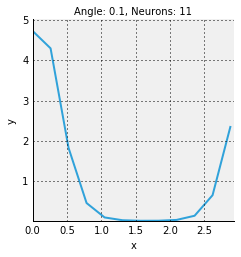
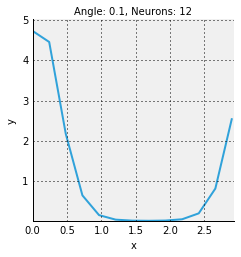
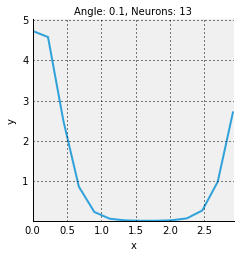
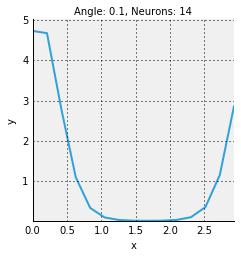
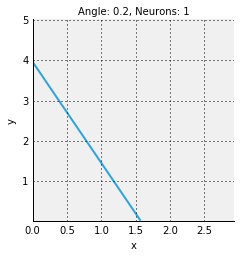
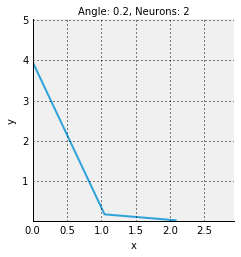
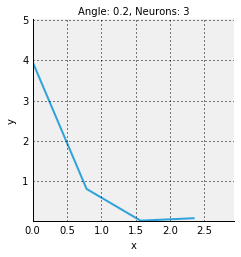
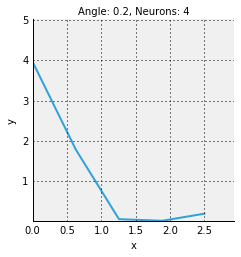
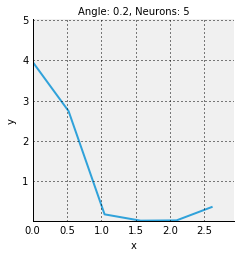
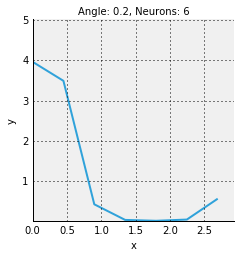
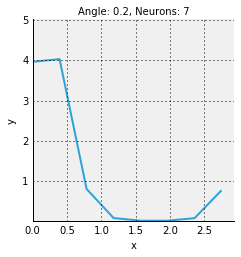
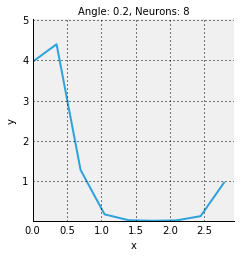
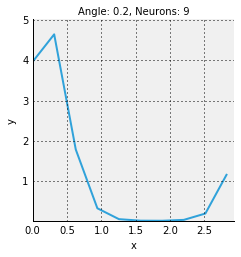
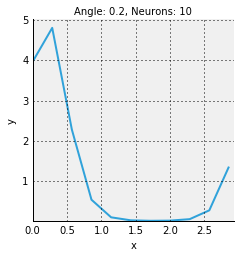
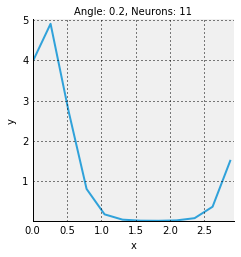
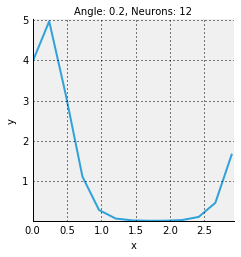
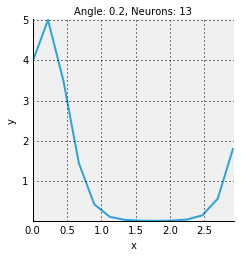
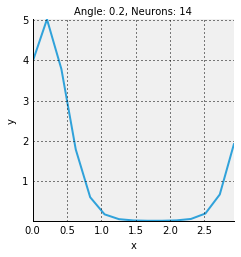
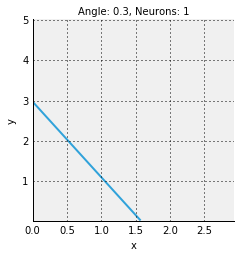
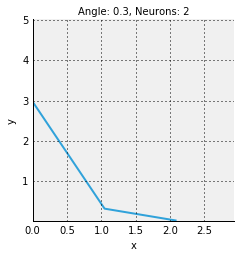
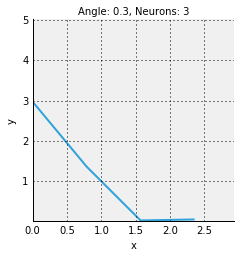
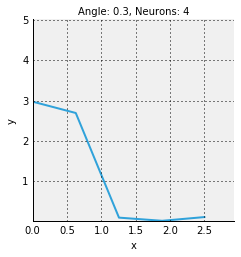
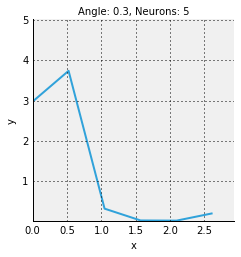
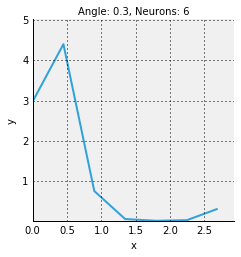
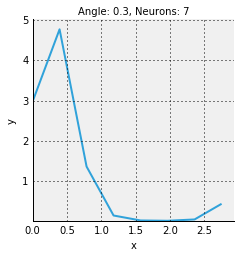
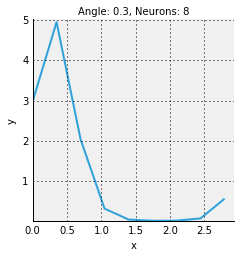
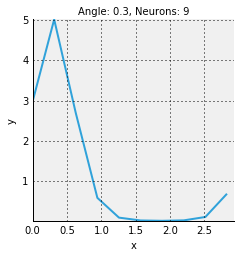
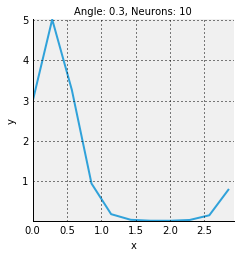
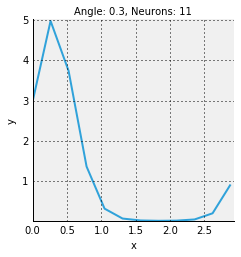
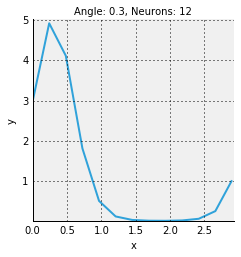
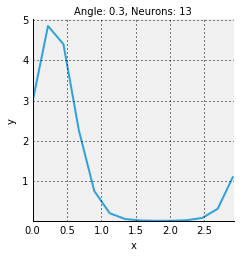
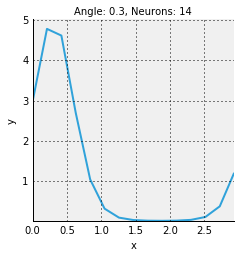
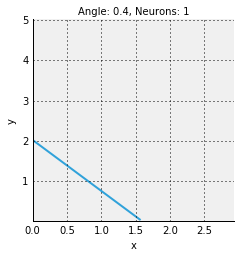
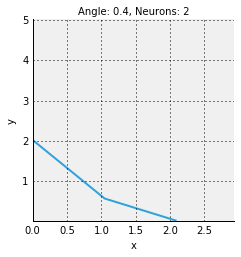
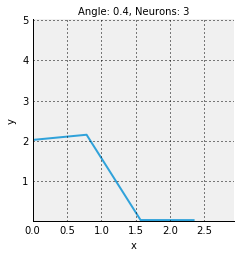
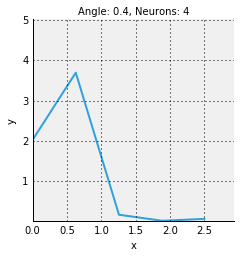
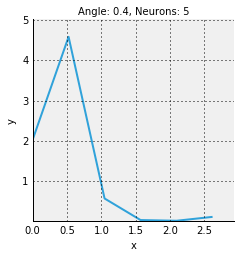
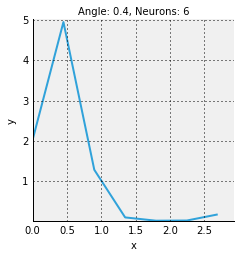
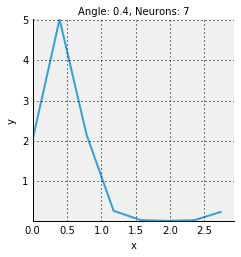
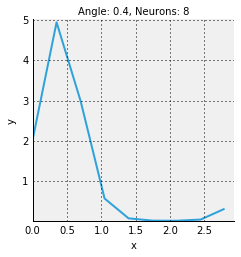
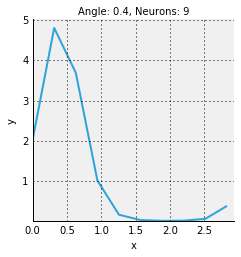
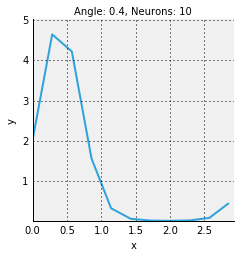
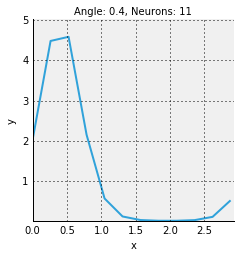
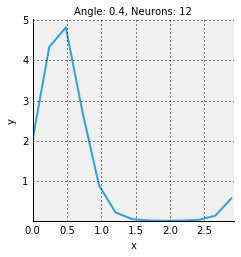
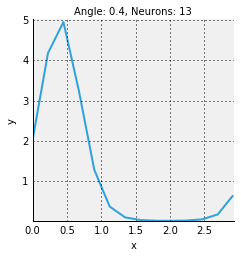
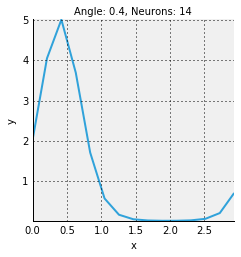
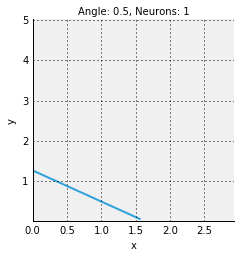
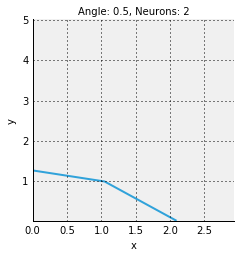
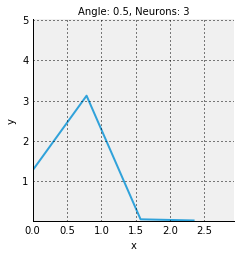
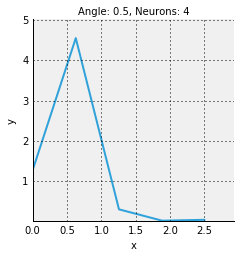
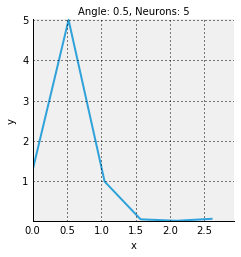
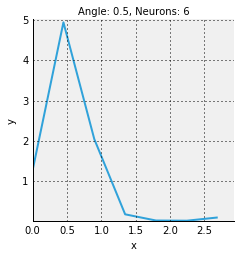
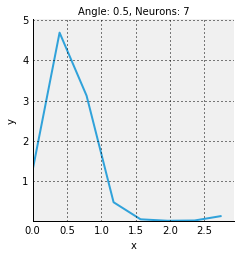
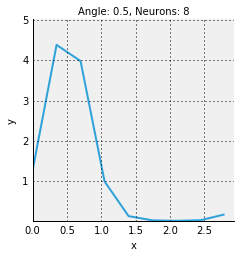
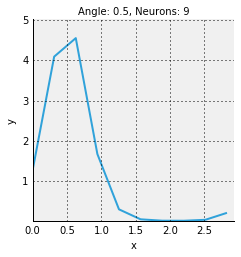
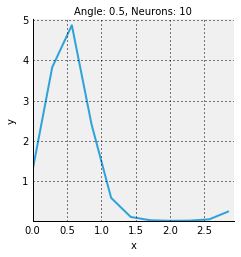
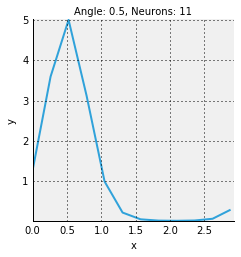
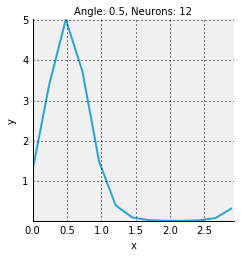
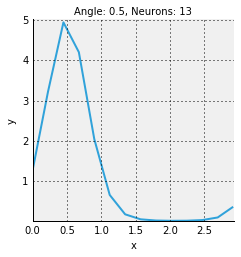
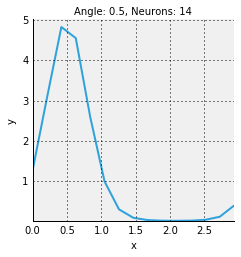
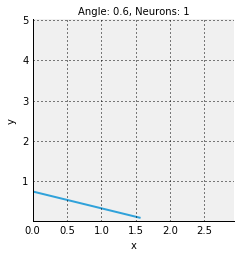
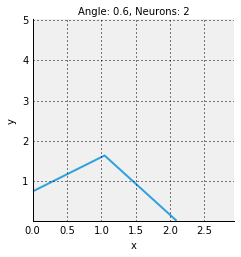
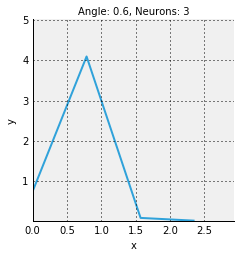
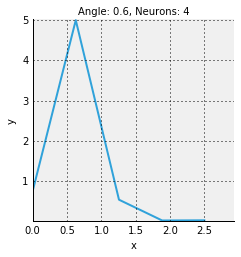
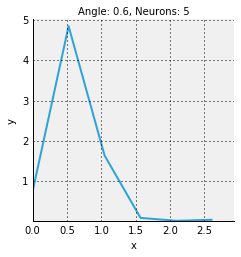
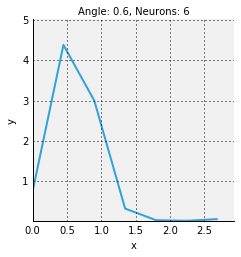
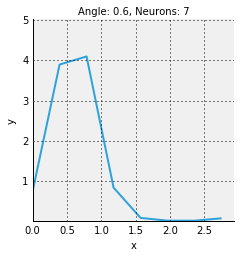
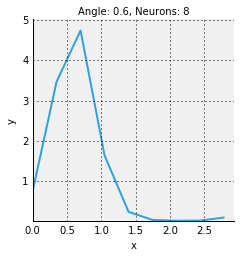
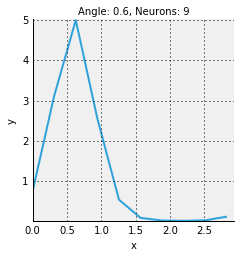
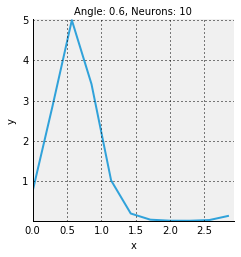
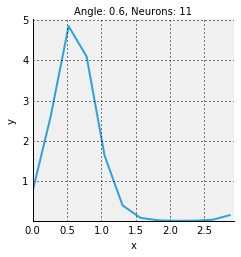
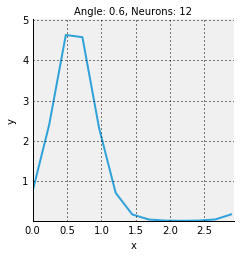
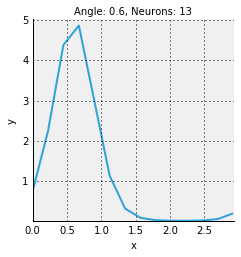
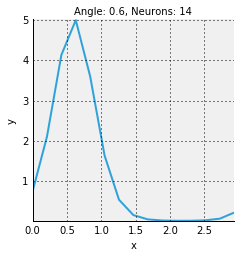
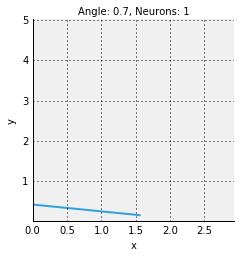
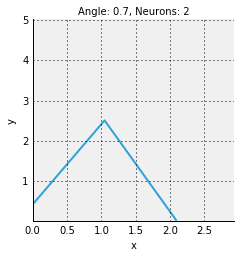
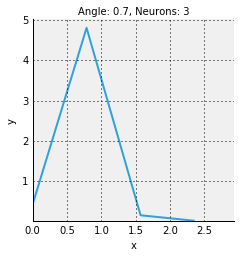
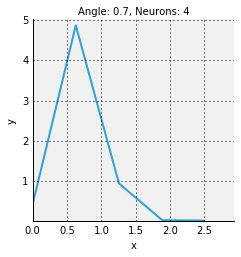
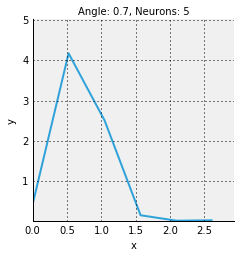
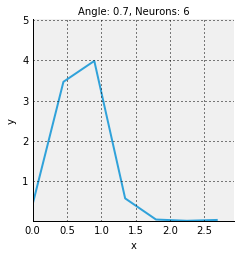
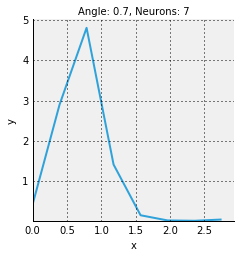
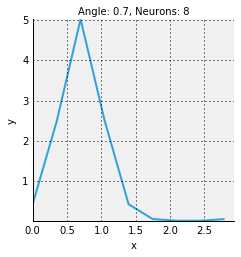
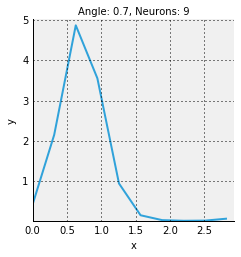
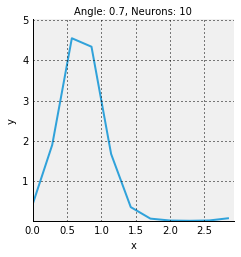
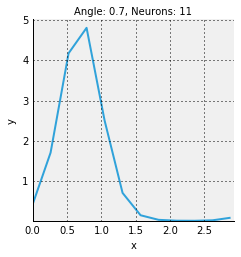
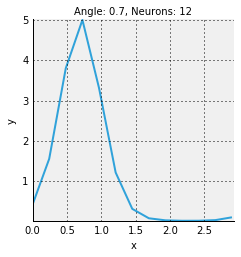
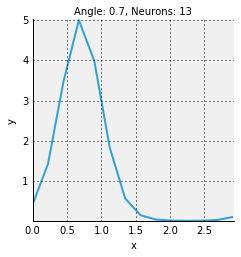
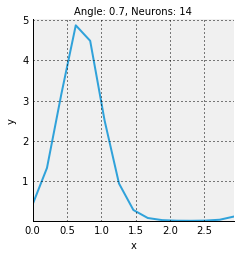
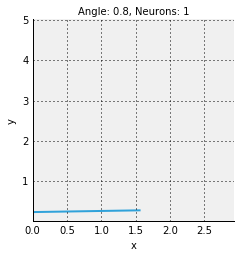
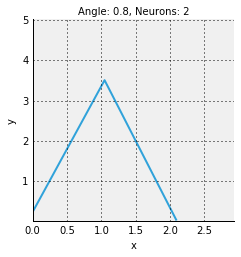
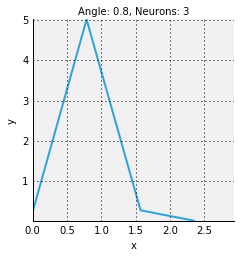
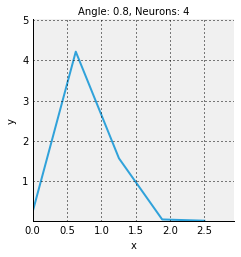
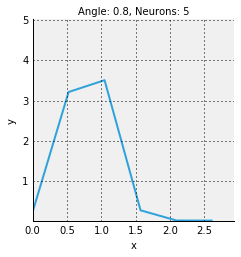
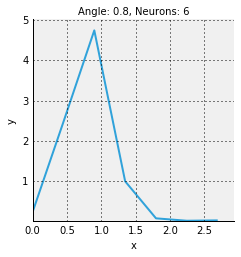
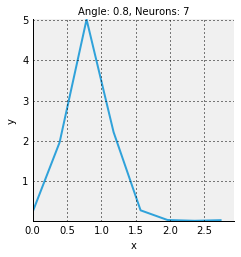
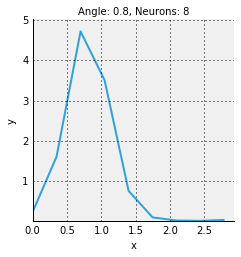
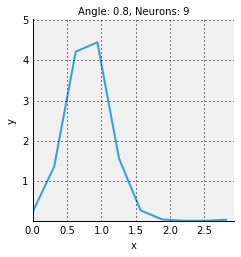
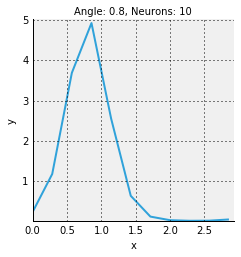
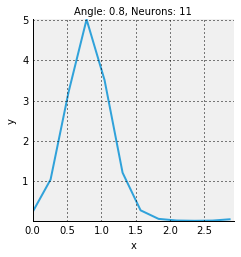
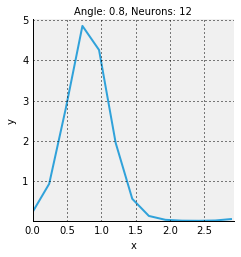
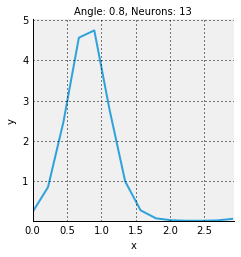
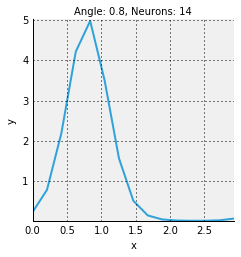
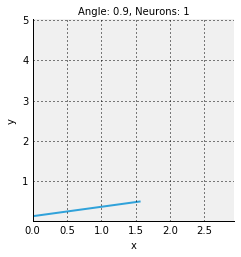
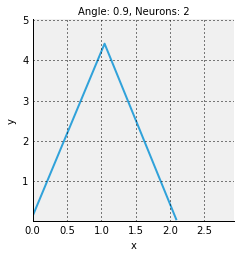
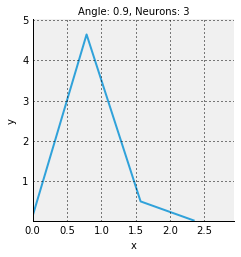
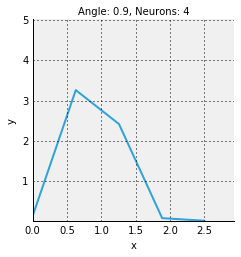
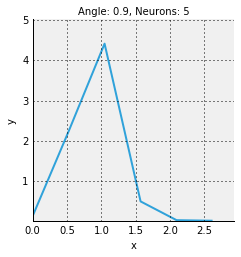
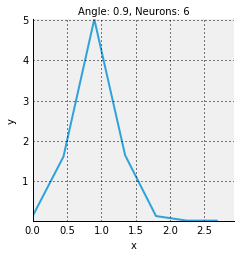
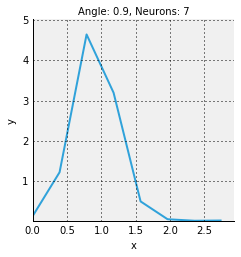
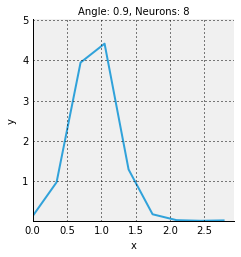
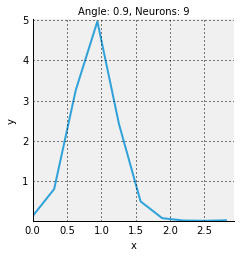
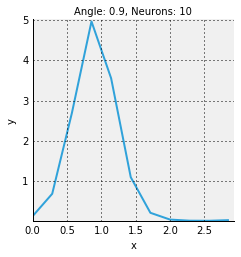
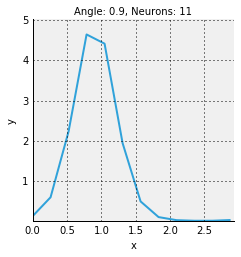
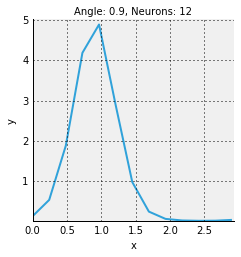
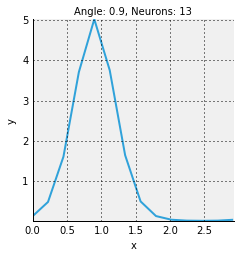
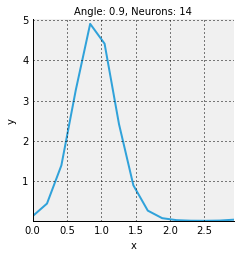
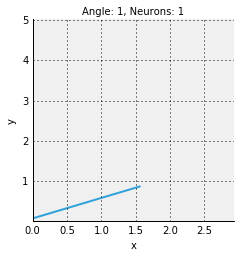
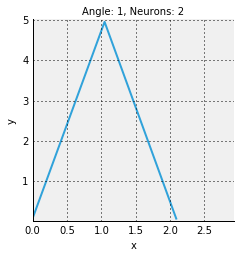
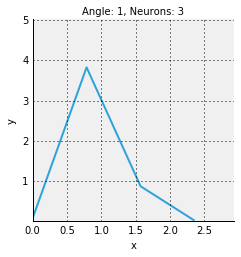
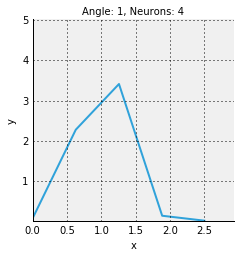
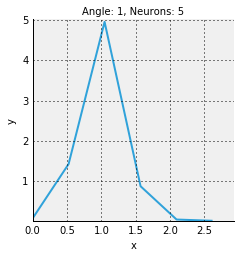
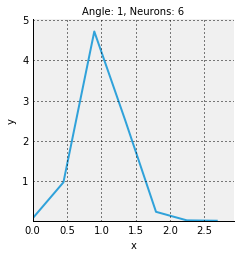
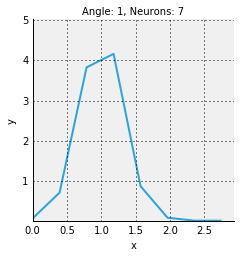
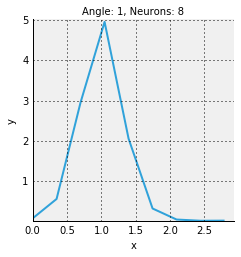
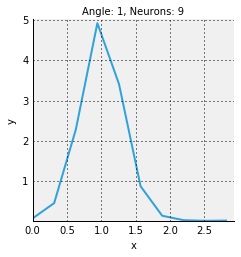
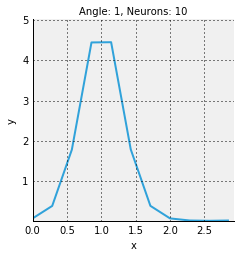
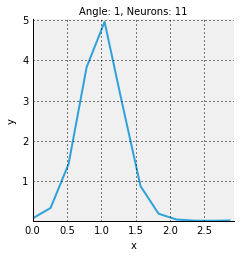
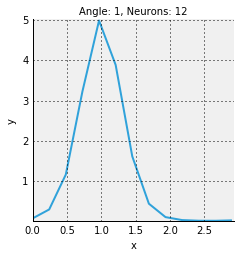
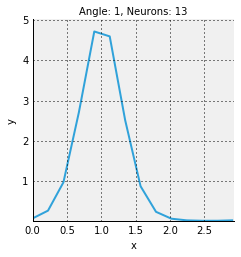
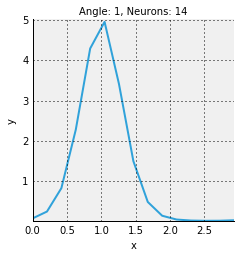
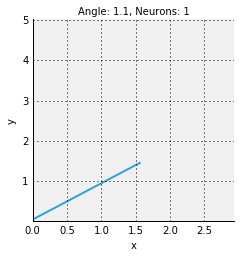
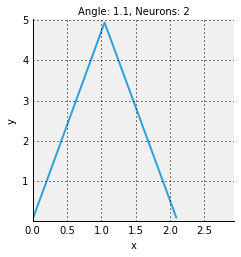
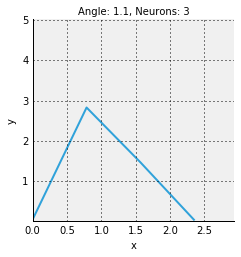
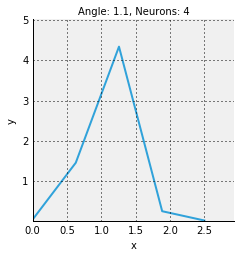
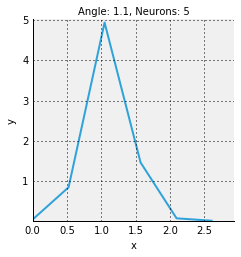
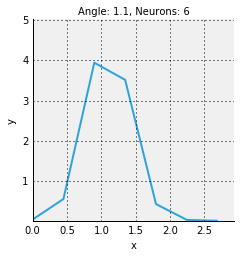
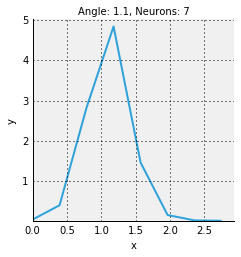
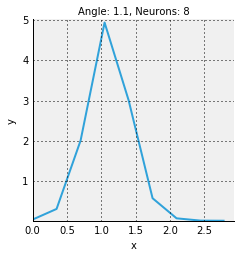
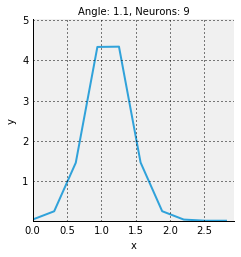
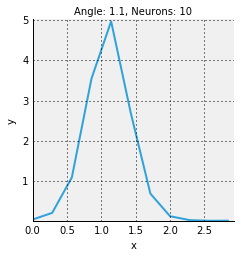
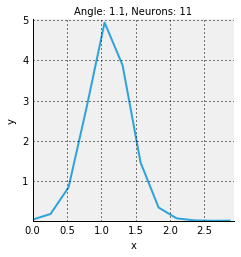
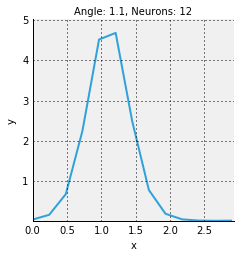
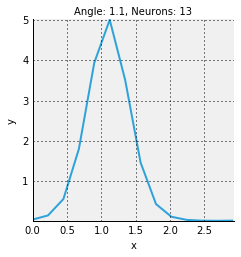
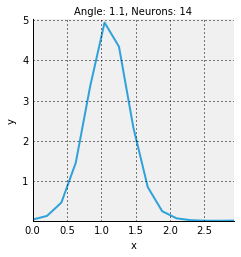
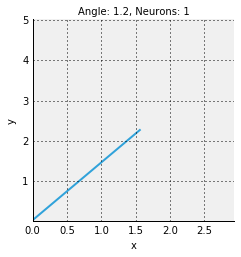
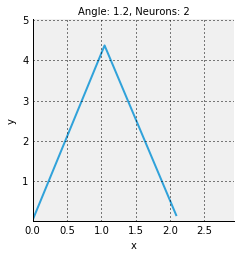
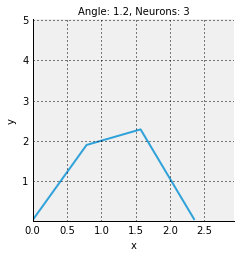
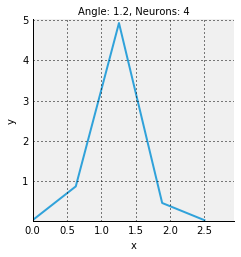
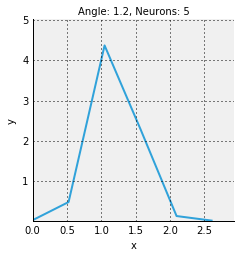
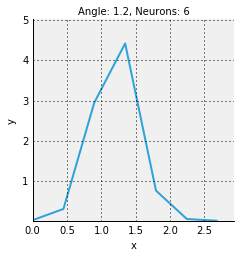
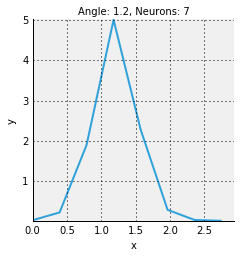
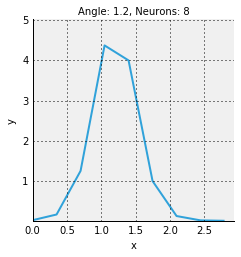
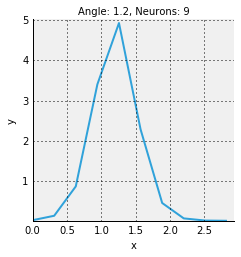
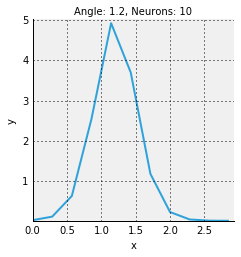
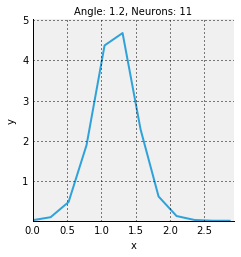
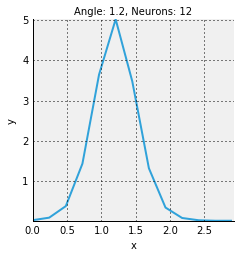
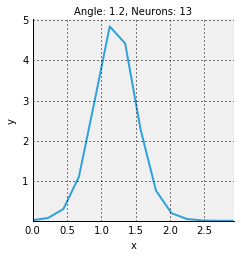
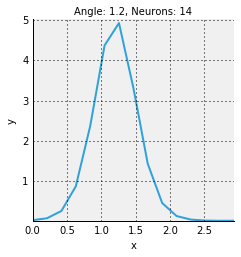
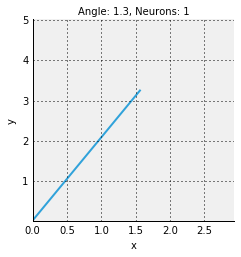
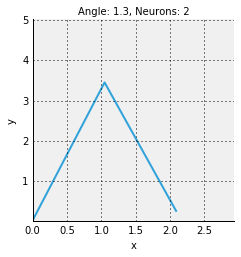
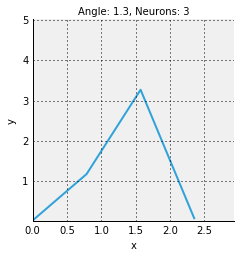
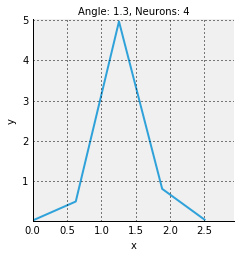
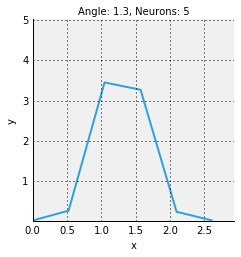
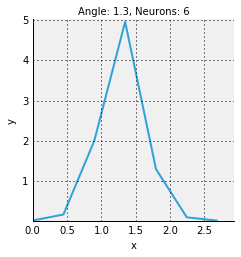
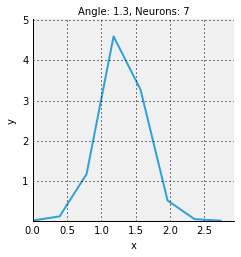
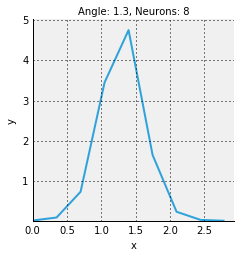
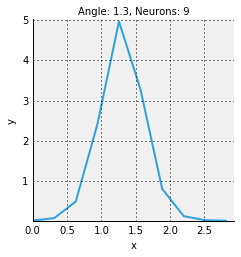
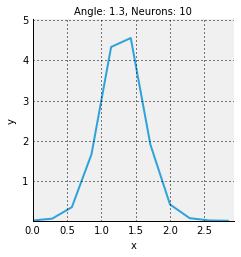
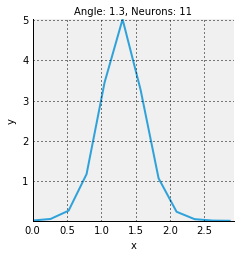
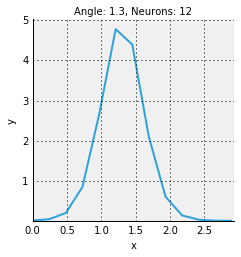
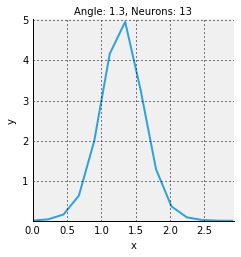
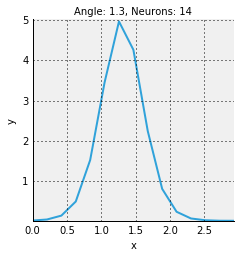
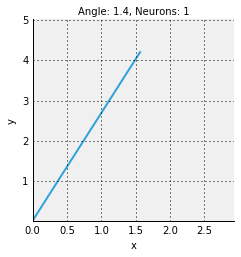
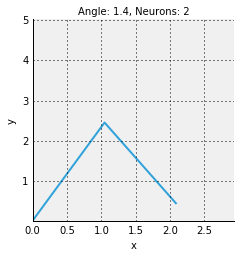
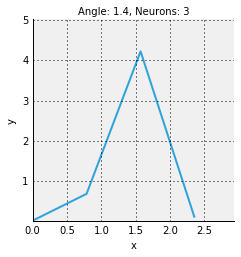
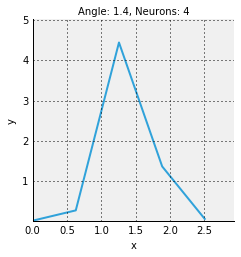
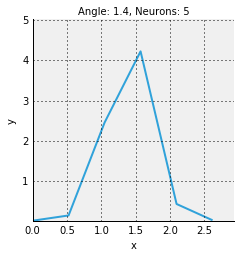
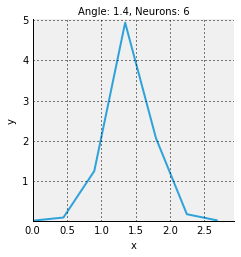
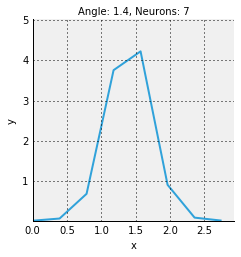
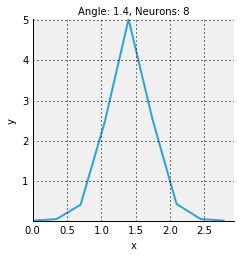
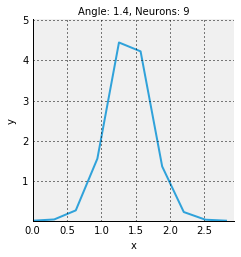
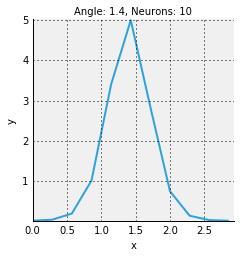
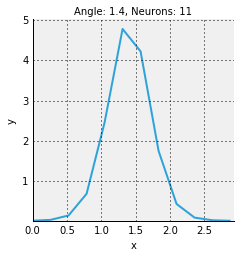
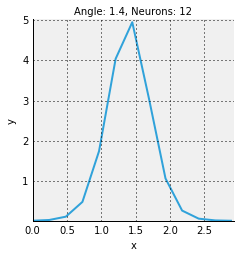
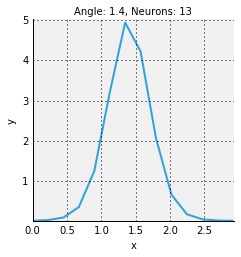
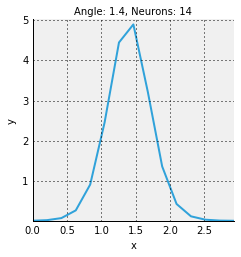
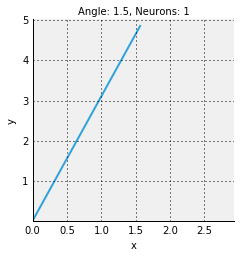
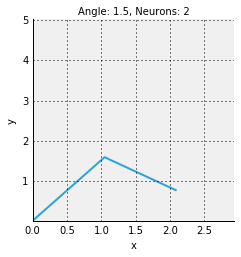
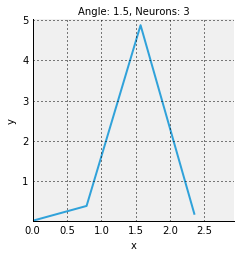
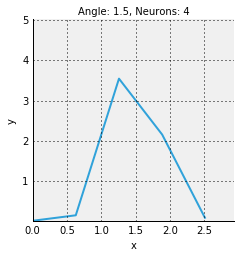
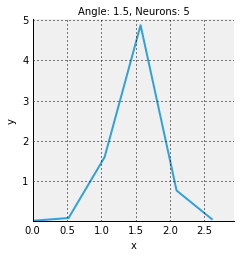
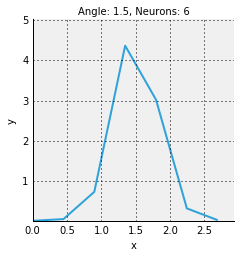
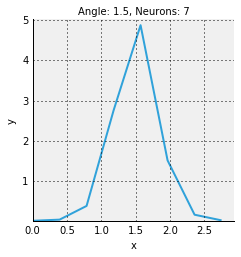
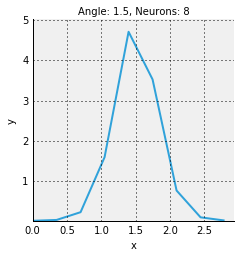
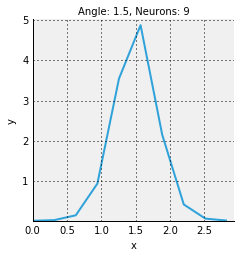
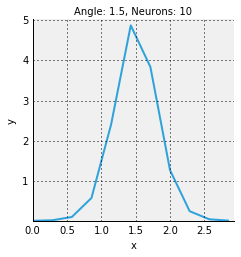
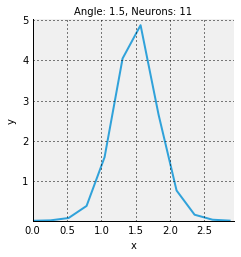
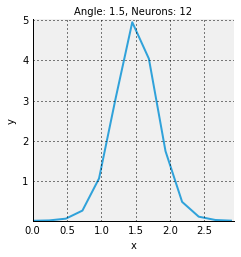
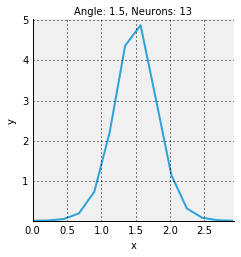
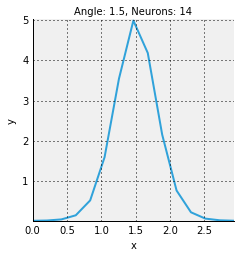
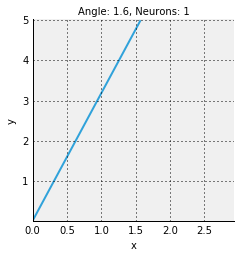
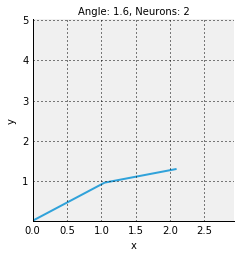
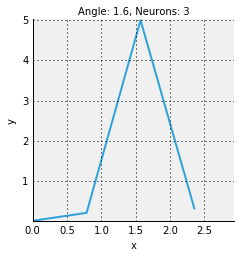
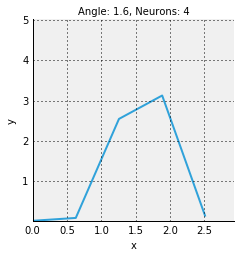
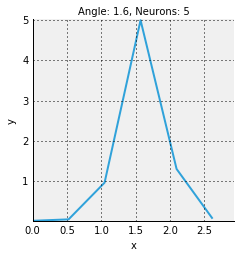
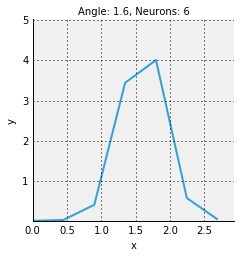
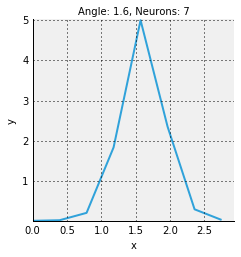
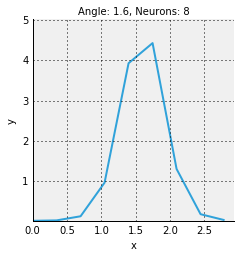
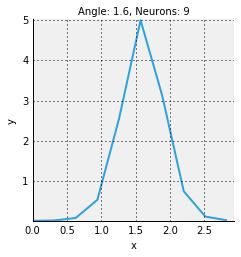
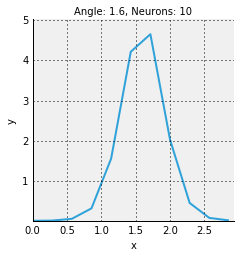
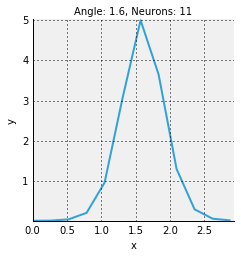
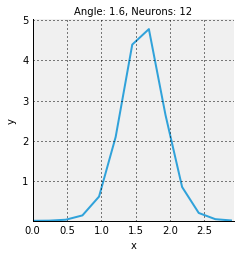
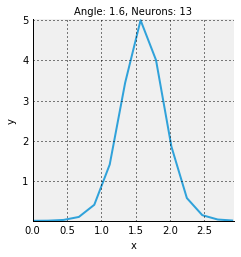
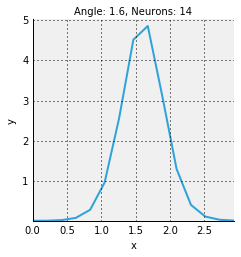
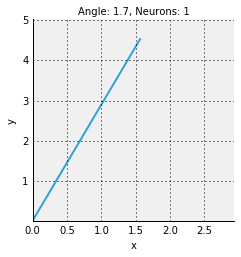
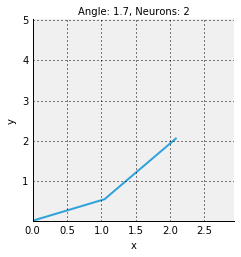
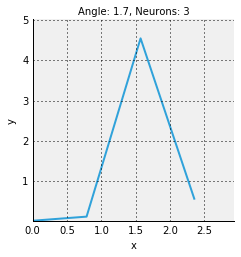
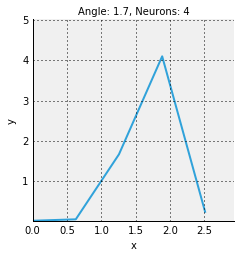
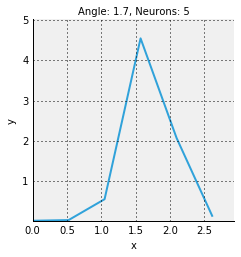
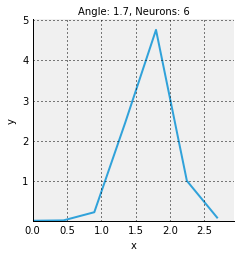
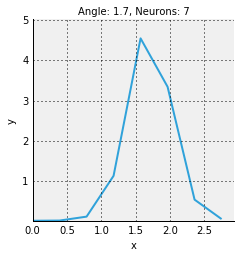
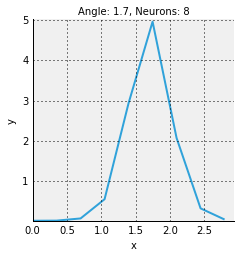
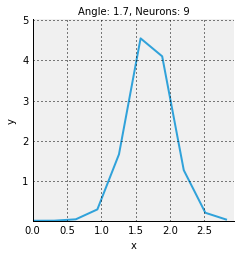
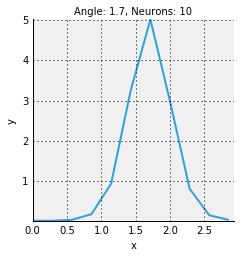
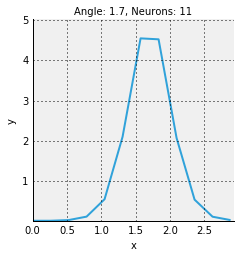
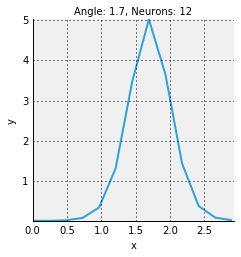
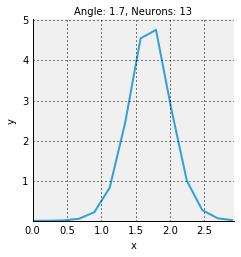
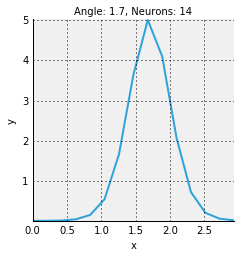
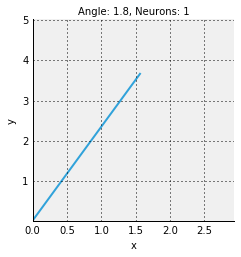
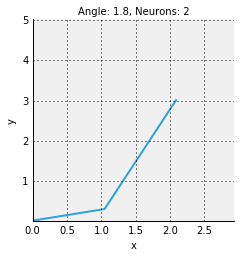
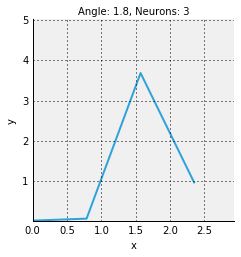
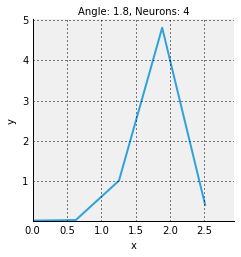
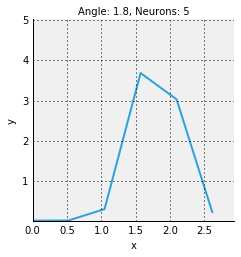
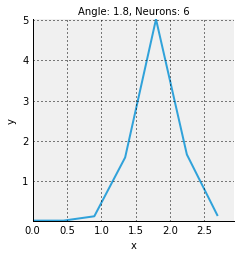
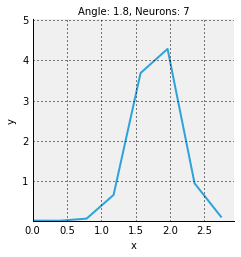
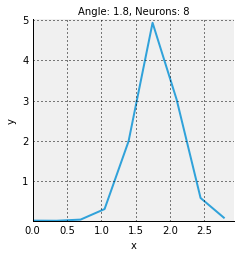
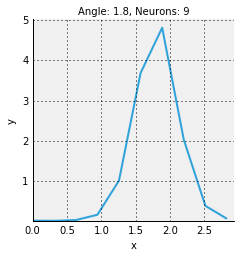
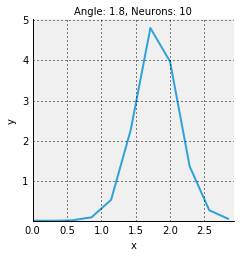
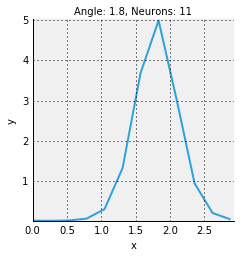
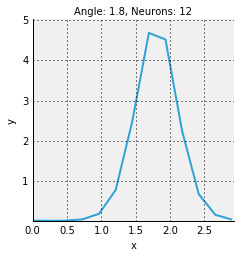
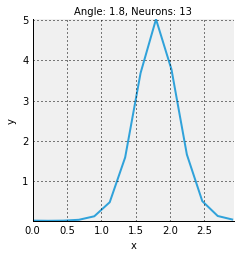
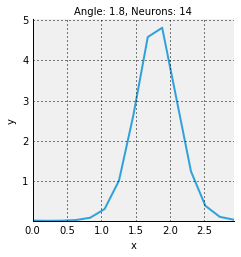
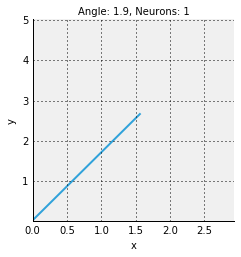
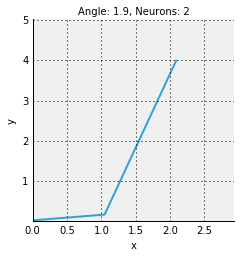
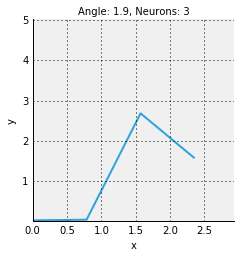
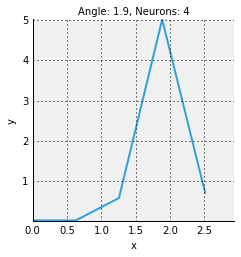
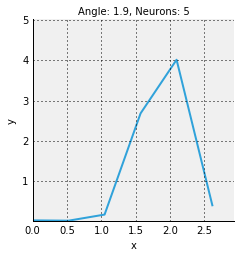
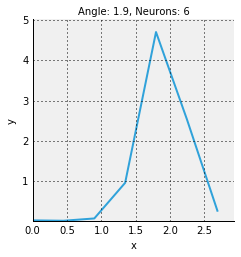
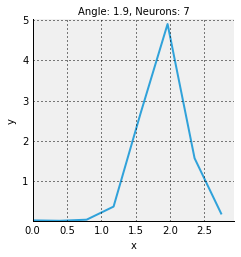
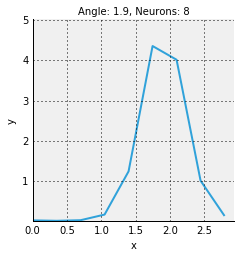
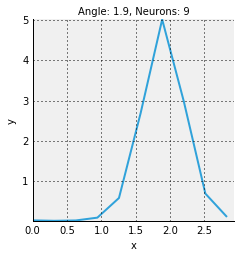
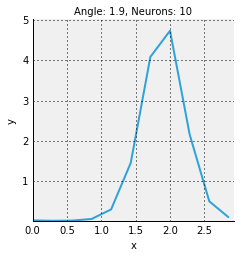
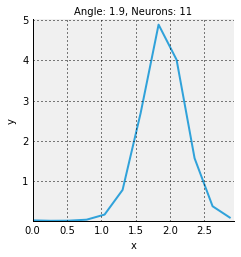
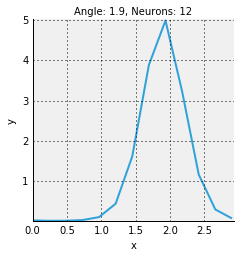
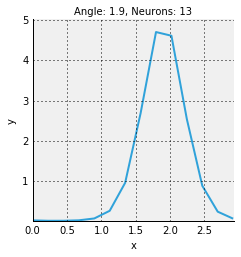
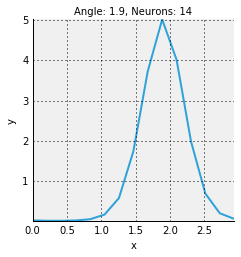
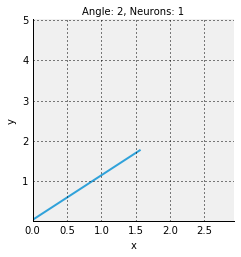
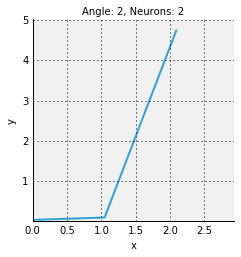
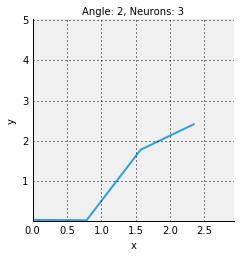
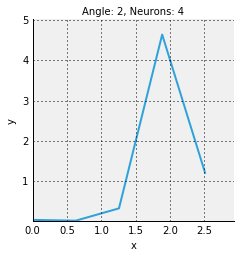
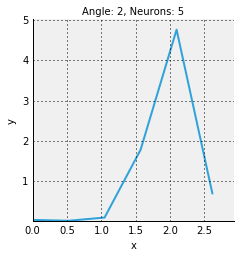
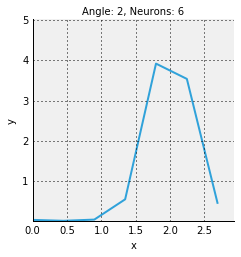
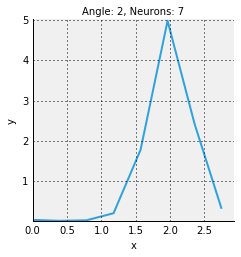
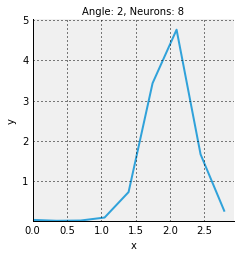
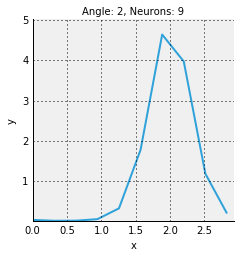
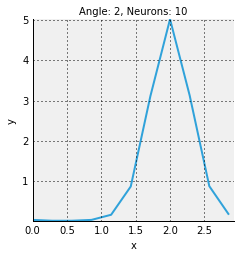
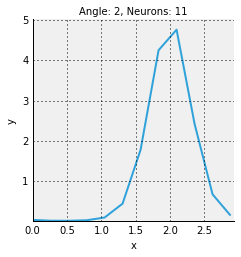
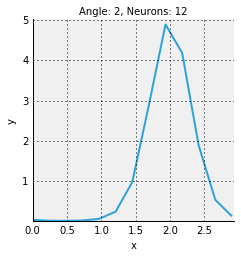
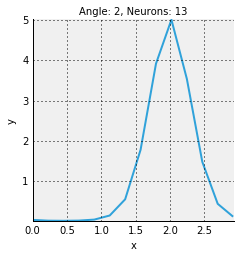
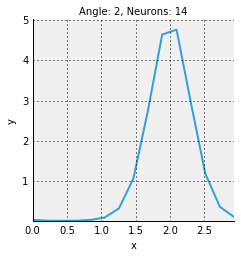
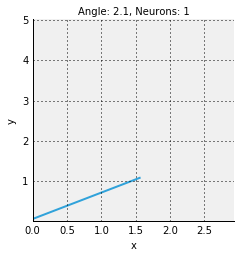
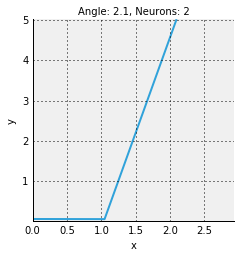
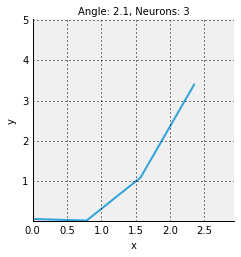
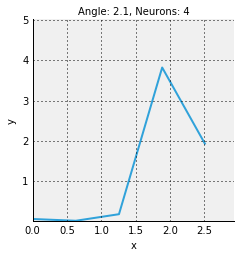
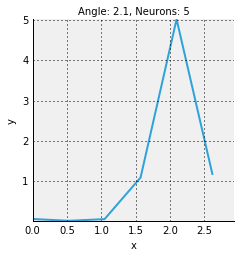
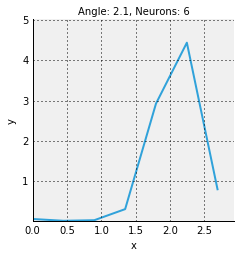
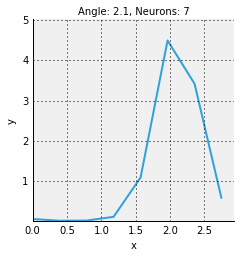
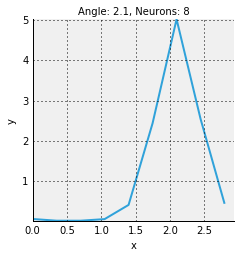
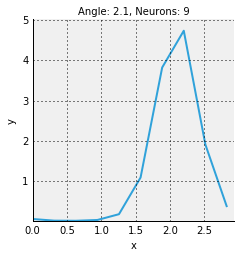
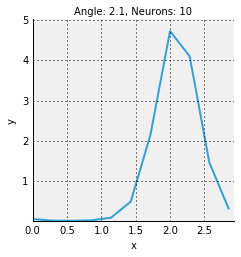
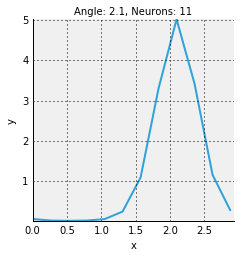
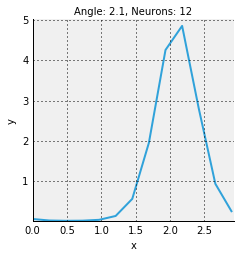
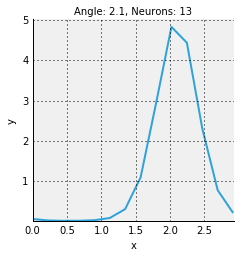
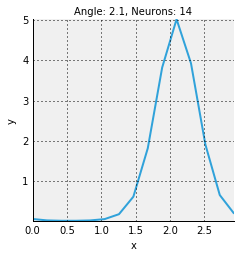
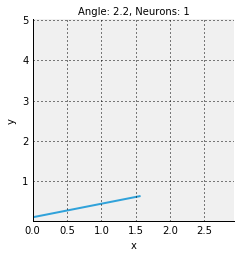
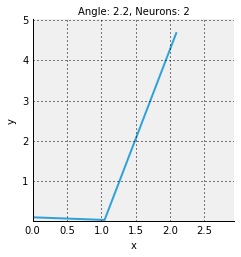
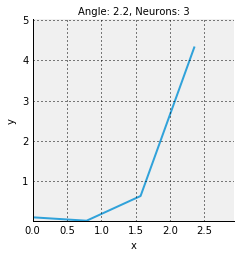
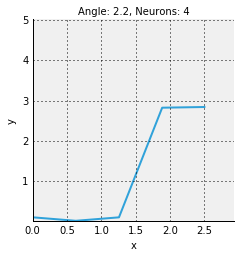
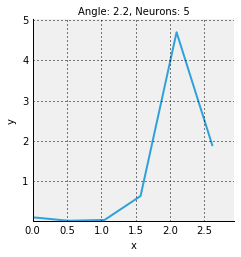
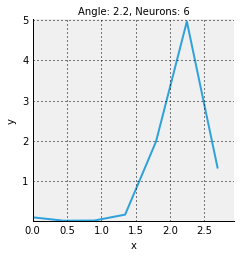
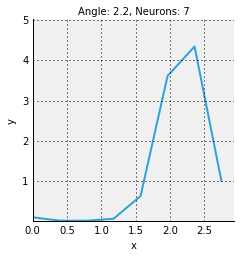
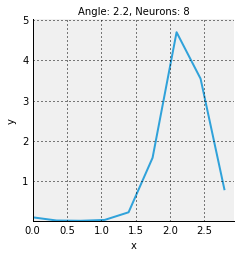
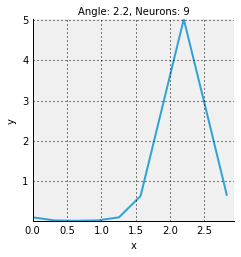
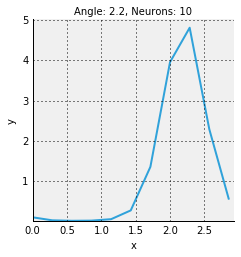
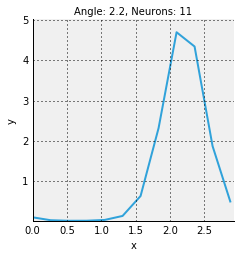
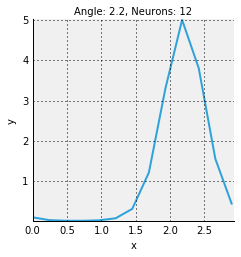
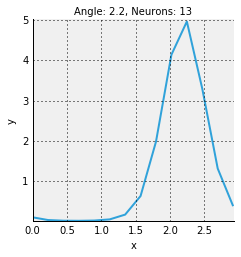
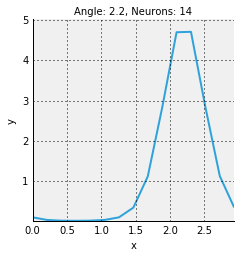
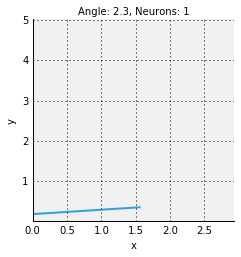
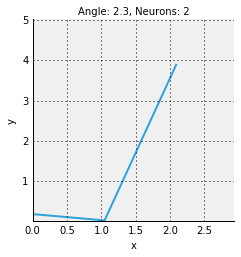
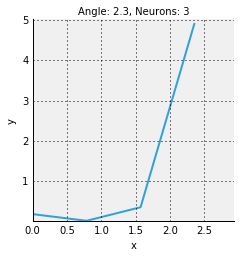
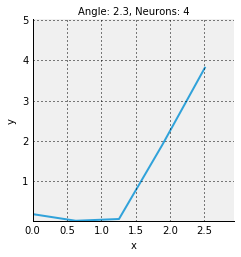
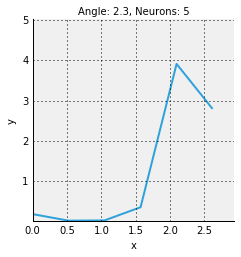
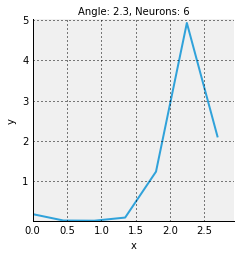
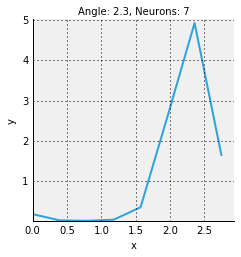
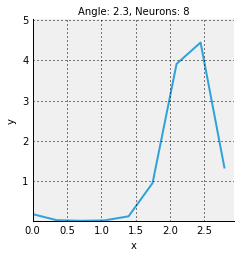
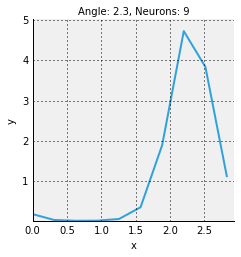
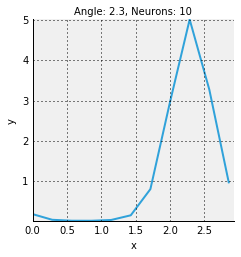
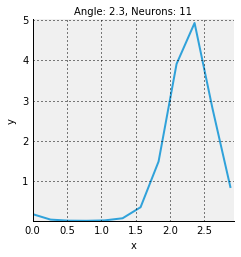
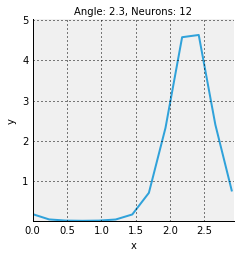
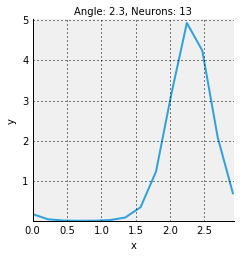
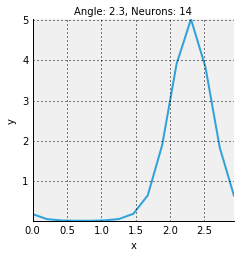
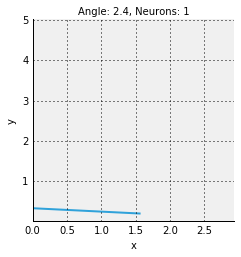
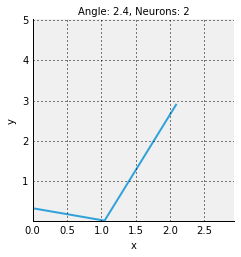
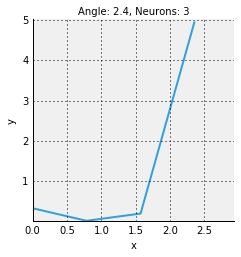
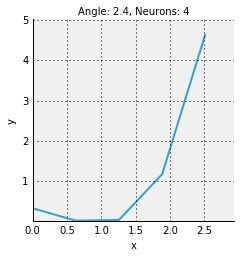
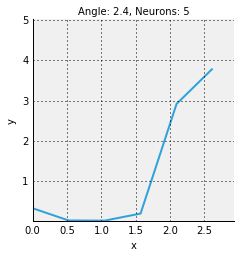
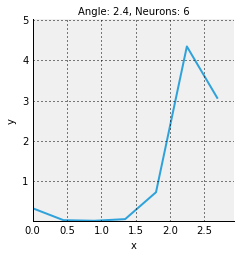
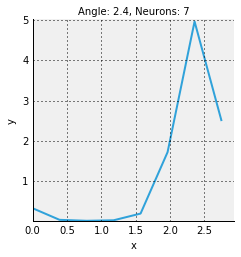
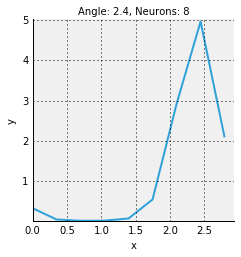
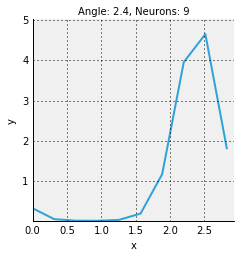
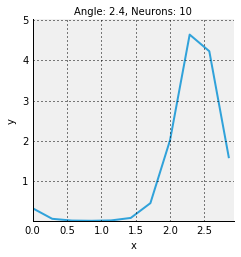
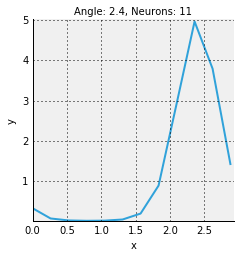
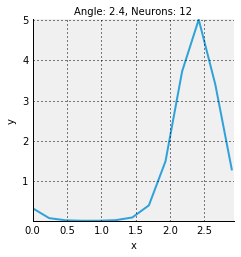
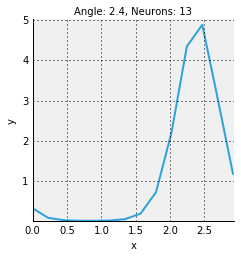
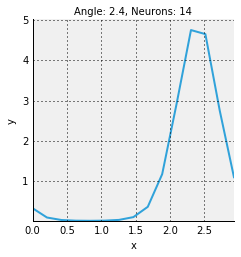
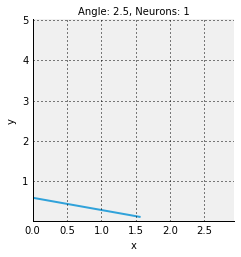
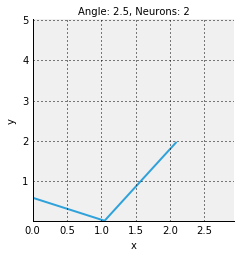
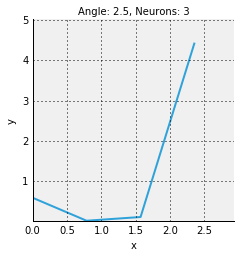
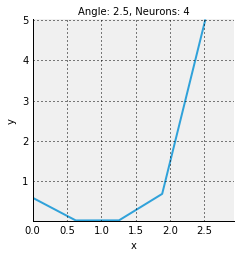
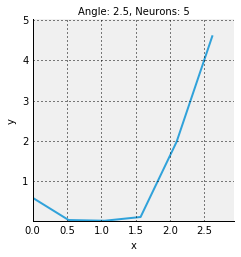
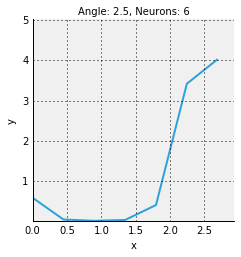
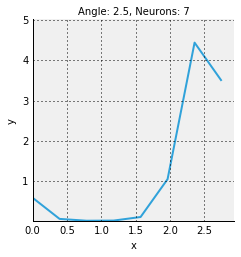
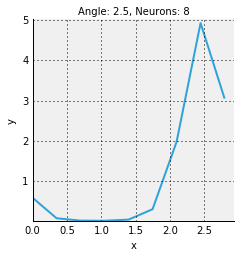
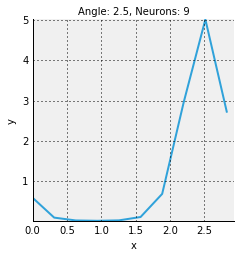
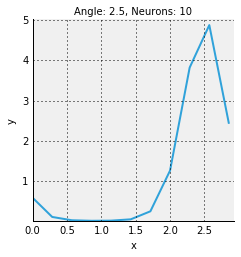
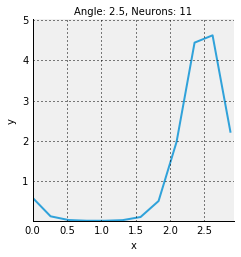
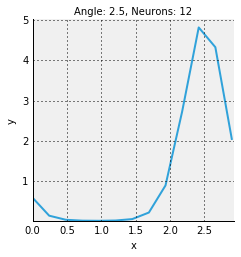
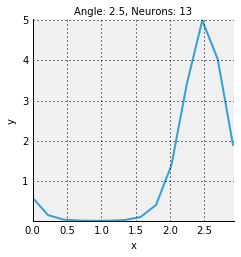
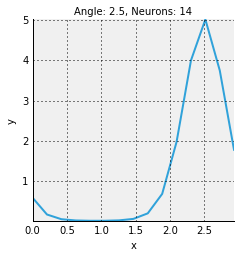
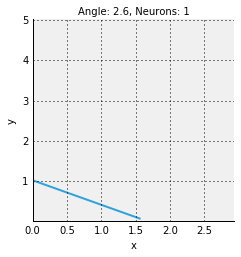
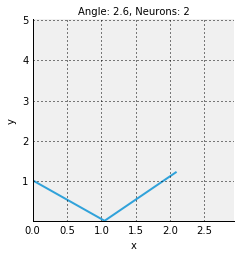
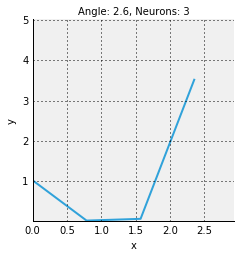
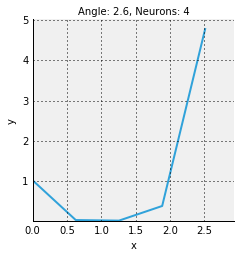
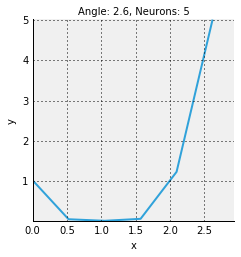
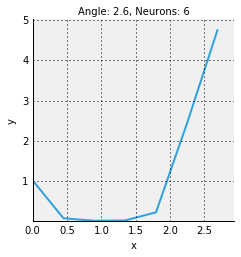
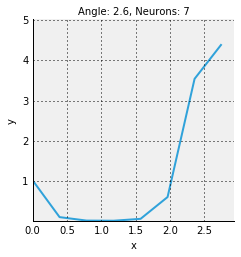
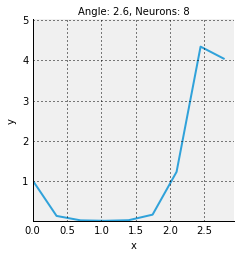
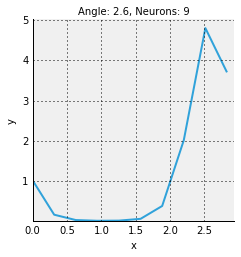
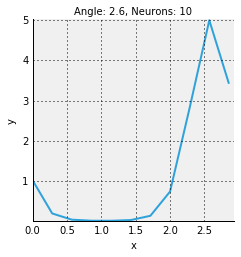
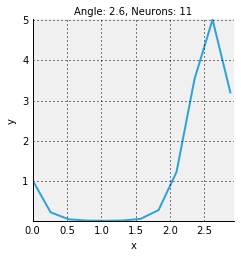
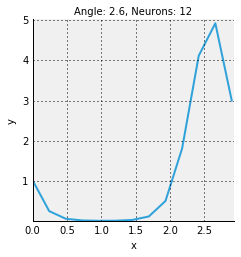
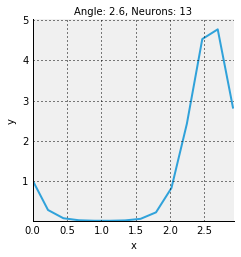
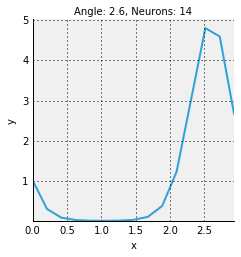
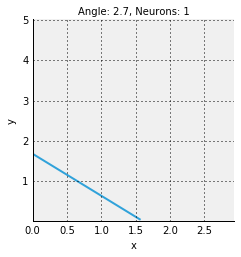
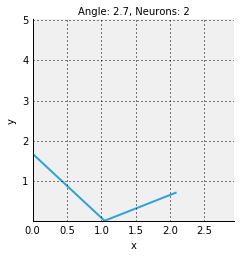
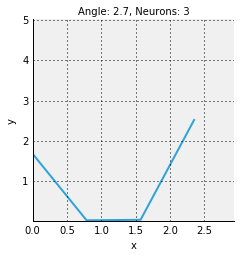
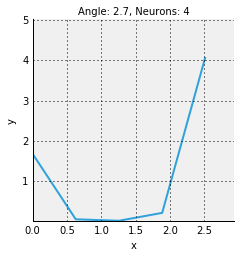
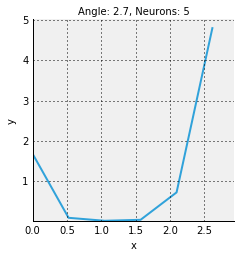
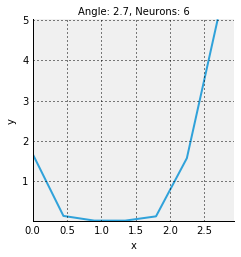
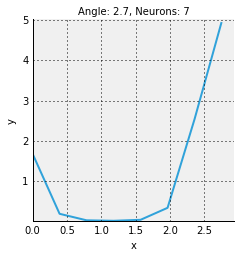
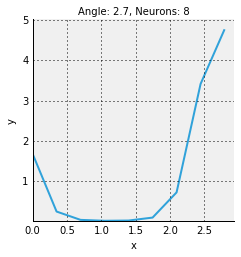
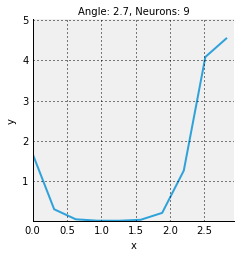
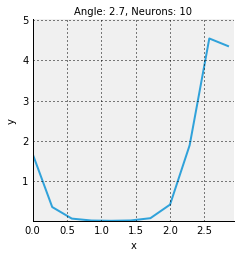
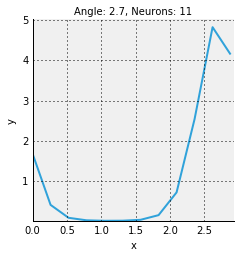
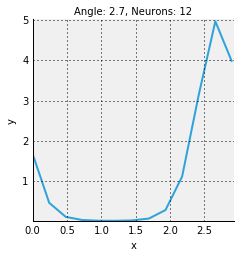
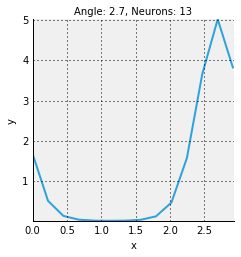
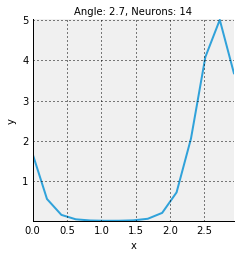
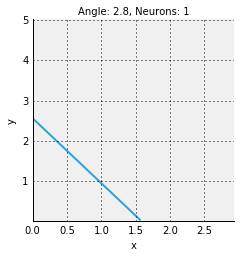
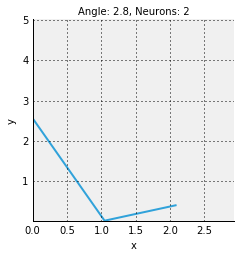
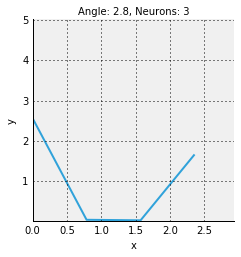
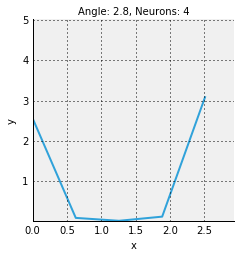
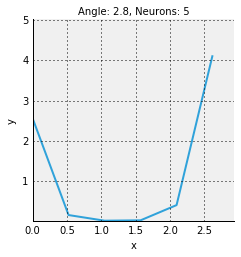
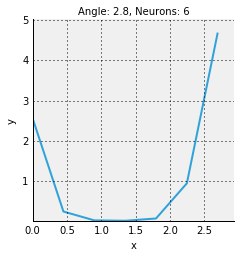
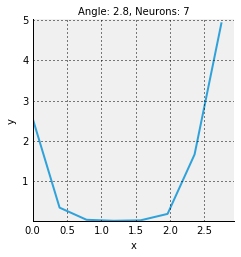
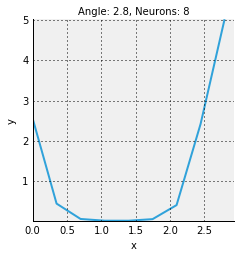
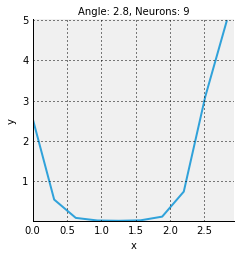
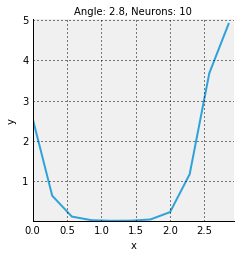
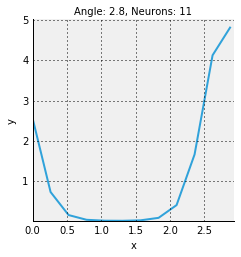
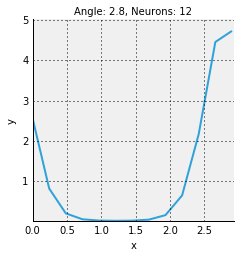
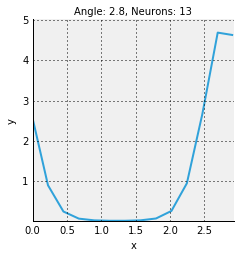
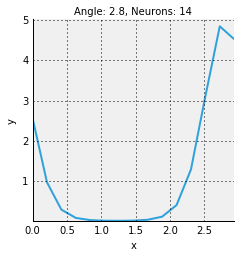
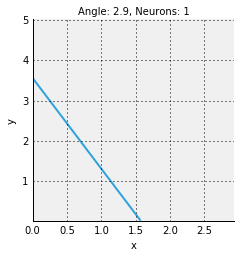
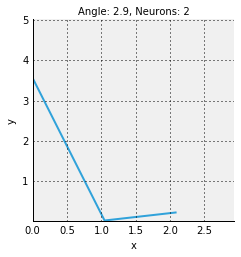
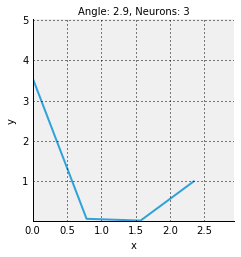
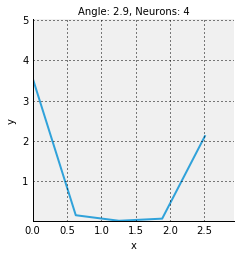
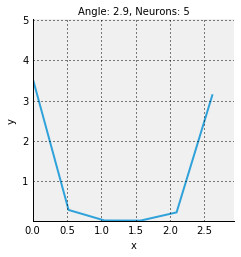
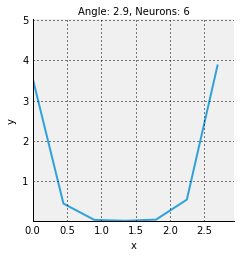
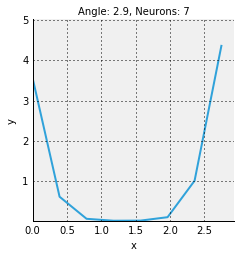
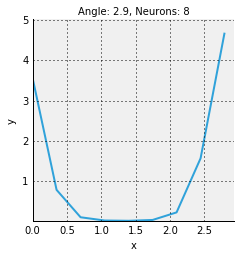
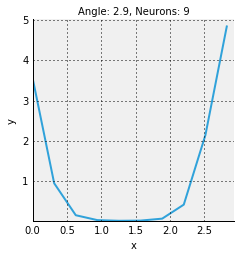
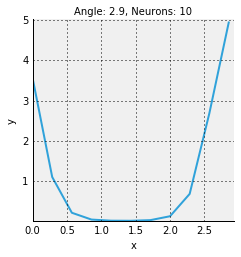
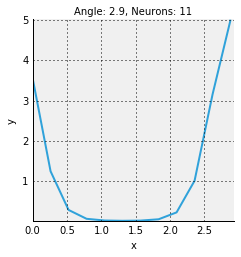
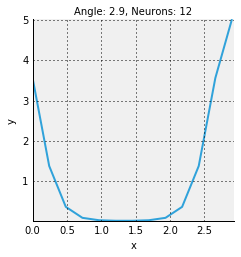
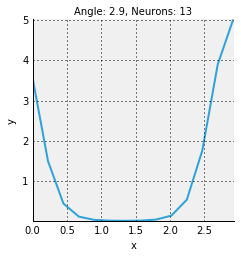
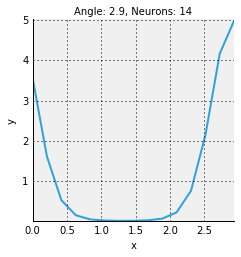
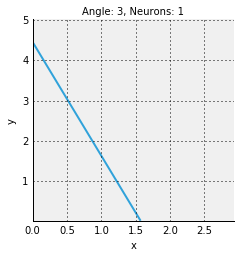
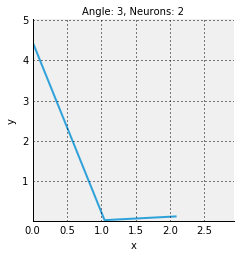
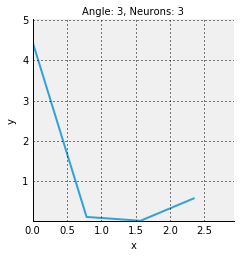
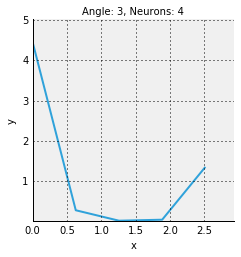
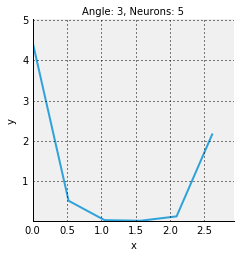
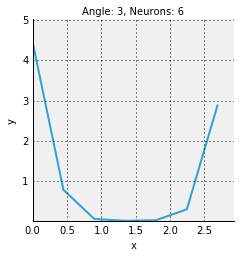
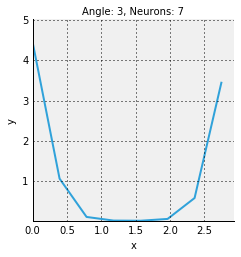
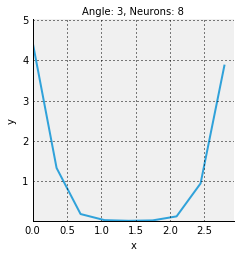
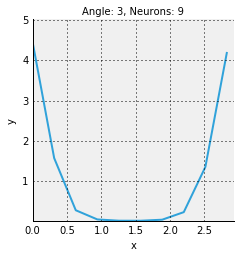
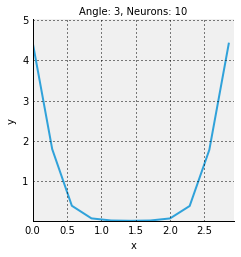
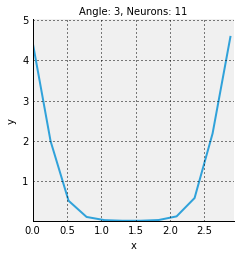
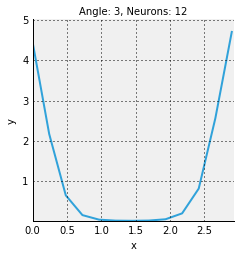
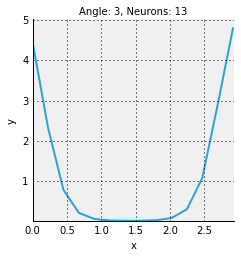
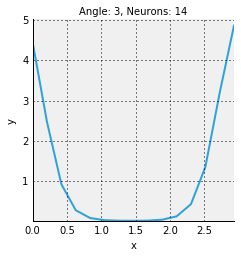
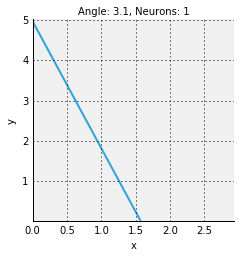
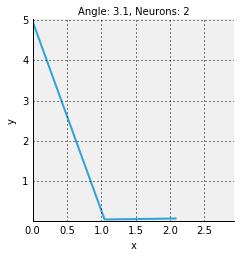
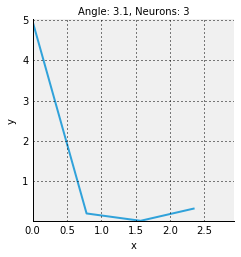
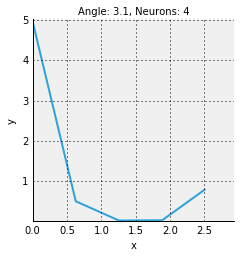
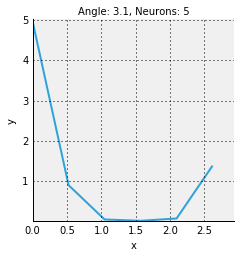
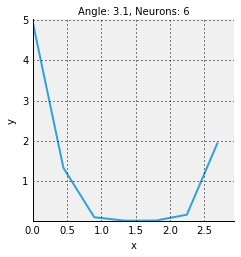
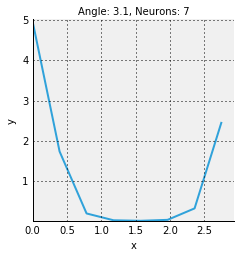
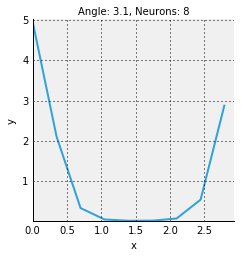
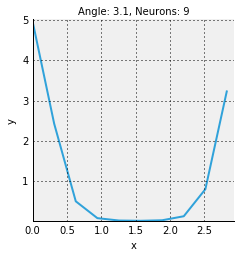
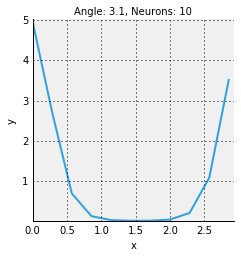
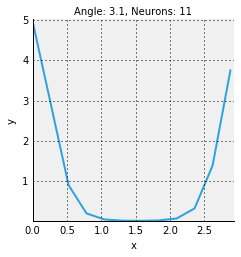
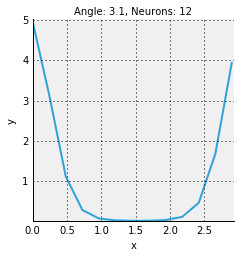
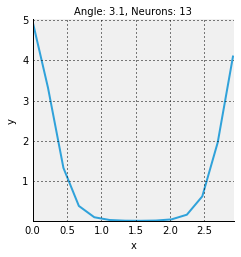
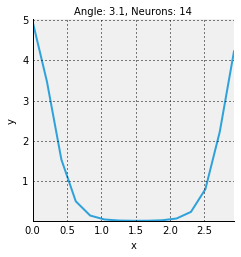

In [13]:
# Display the responses
vonMises = hv.HoloMap(data, kdims=['Angle', 'Neurons'])
vonMises

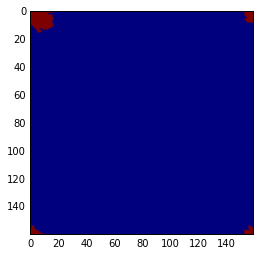

In [21]:
from skimage.draw import line_aa

size_x = 10
size_y = 10
l = 16
img = np.zeros([size_x*l,size_y*l])
hl = l/2
count = 0
for i in range(0,size_x):
    for j in range(0,size_y):
        # th = theta[count]
        th = random()
        #    th += pl.pi/4 # so that the orientation is relative to the vertical
        hl = l/2 # half length bar
    
        # define x and y points of bar
        X = [x-sin(th)*hl,x+sin(th)*hl]
        Y = [y-cos(th)*hl,y+cos(th)*hl]
        
        rr, cc, val = line_aa(X[0], Y[0], X[1], Y[1])
        img[rr, cc] = 1
        count+=1
plt.imshow(img)

:Curve   [x]   (y)
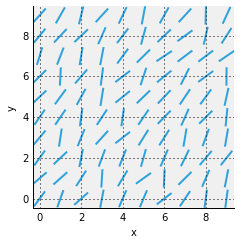

In [15]:
# Visualization of orienatations
from random import random

x_ind = []
y_ind = []
theta = []
for i in range(0,10):
    for j in range(0,10):
        x_ind.append(i)
        y_ind.append(9-j)
        theta.append(random())
        
bars1 = plotbar(x_ind,y_ind,theta,l=0.9)
bars1


:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)
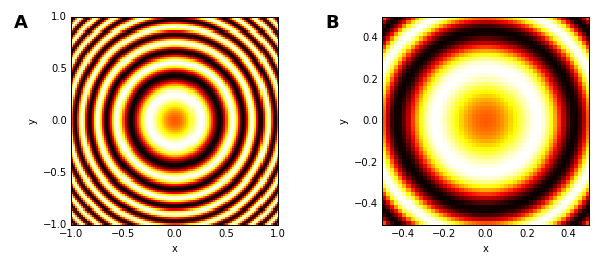

In [16]:
x,y = np.mgrid[-50:51, -50:51] * 0.1
bounds=(-1,-1,1,1)   # Coordinate system: (left, bottom, top, right)

(hv.Image(np.sin(x**2+y**2),   bounds=bounds) + hv.Image(np.sin(x**2+y**2), bounds=bounds)[-0.5:0.5, -0.5:0.5])

In [ ]:
function displayHOG2(hog,index)
%Visualizing HOG
histogram = zeros(size(hog,1)*16,size(hog,2)*16);
imshow(histogram);
hold on;
lineLength = 8;
%angle = 5*pi/9;

for i=1:size(hog,1)
    for j=1:size(hog,2)
        angle = hog(i,j)*pi;
        p1 = [(i-1)*16+8-lineLength * sin(angle),(j-1)*16+8-lineLength * cos(angle)];
        p2 = [(i-1)*16+8+lineLength * sin(angle),(j-1)*16+8+lineLength * cos(angle)];
        plot([p1(2),p2(2)],[p1(1),p2(1)],'Color',[1 1 1],'LineWidth',1);
        hold on;
    end
end
h = getframe;
imwrite(h.cdata, strcat(num2str(index),'.png'));
close all;
end

In [1]:
from skimage.draw import line
img = np.zeros((10, 10), dtype=np.uint8)
rr, cc = line(1, 1, 8, 8)
img[rr, cc] = 1
hv.Image(img)

ImportError: No module named skimage.draw

Bouchesin - how to model the connections between the neurons
http://philippjfr.com/blog/